# Data

In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv("/kaggle/input/mallorn/mallorn-astronomical-classification-challenge/train_log.csv")

In [4]:
train_df.shape

(3043, 8)

In [5]:
test_df = pd.read_csv("/kaggle/input/mallorn/mallorn-astronomical-classification-challenge/test_log.csv")
test_df.shape

(7135, 7)

In [6]:
train_df.sample(2)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


object_id       Z  Z_err    EBV SpecType  \
1728  faradrim_Mithrim_Druadan  0.2894    NaN  0.033    SN Ia   
580            ruith_cuil_fast  0.5186    NaN  0.043      AGN   

               English Translation     split  target  
1728  hunters + Sindar + Wild Man   split_12       0  
580    anger + life +  shaggy hair  split_04       0

In [7]:
train_df.value_counts("target")

target
0    2895
1     148
Name: count, dtype: int64

In [8]:
train_df.value_counts("target")[0]/len(train_df)

0.9513637857377588

- Dữ liệu ít, chỉ hơn 3000, data mất imbalance nặng 0/1 ~ 95/5

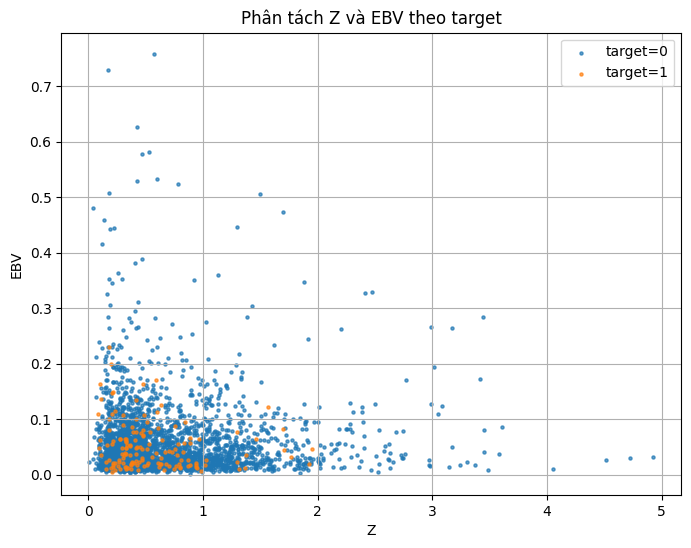

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8, 6))

for label in train_df['target'].unique():
    subset = train_df[train_df['target'] == label]
    plt.scatter(
        subset['Z'],
        subset['EBV'],
        label=f'target={label}',
        alpha=0.7,
        s=5
    )

plt.xlabel('Z')
plt.ylabel('EBV')
plt.title('Phân tách Z và EBV theo target')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

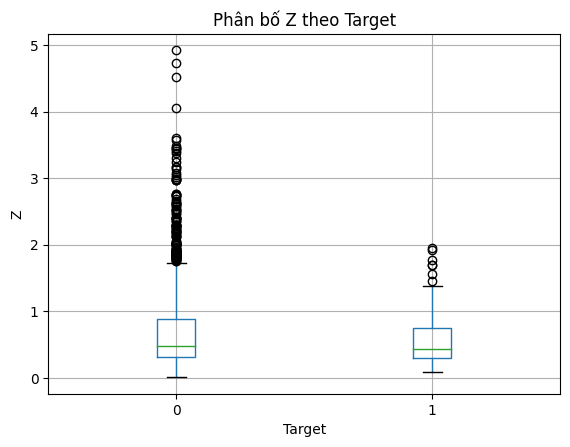

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

train_df.boxplot(column='Z', by='target', grid=True)

plt.xlabel('Target')
plt.ylabel('Z')
plt.title('Phân bố Z theo Target')
plt.suptitle('')
plt.show()

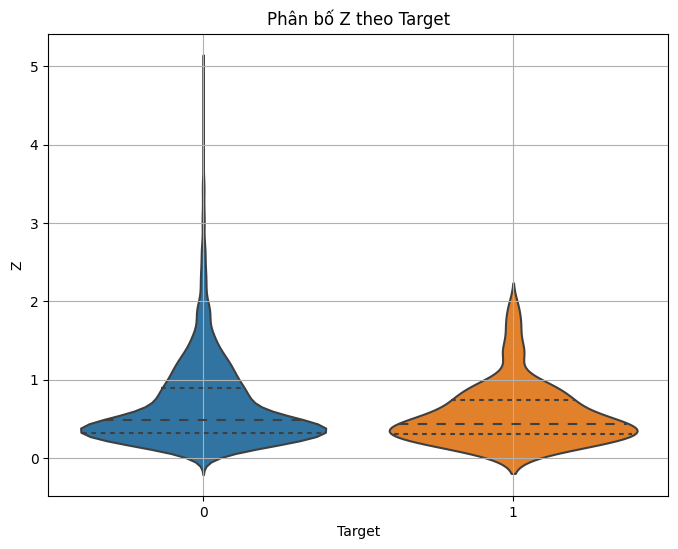

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.violinplot(x='target', y='Z', data=train_df, inner='quartile')

plt.xlabel('Target')
plt.ylabel('Z')
plt.title('Phân bố Z theo Target')
plt.grid(True)
plt.show()

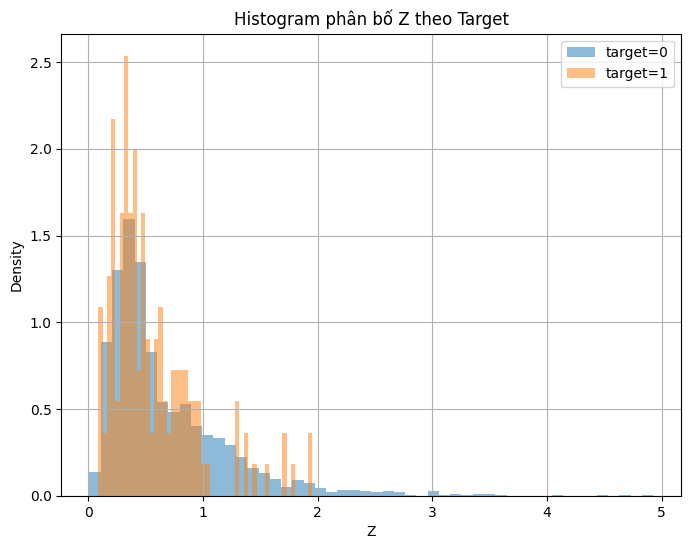

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for label in train_df['target'].unique():
    subset = train_df[train_df['target'] == label]
    plt.hist(
        subset['Z'],
        bins=50,
        alpha=0.5,
        label=f'target={label}',
        density=True
    )

plt.xlabel('Z')
plt.ylabel('Density')
plt.title('Histogram phân bố Z theo Target')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
def get_observed_duration(object_id):
    split_folder = train_df[train_df["object_id"] == object_id].iloc[0]["split"]
    lightcurve_path = f"/kaggle/input/mallorn/mallorn-astronomical-classification-challenge/{split_folder}/train_full_lightcurves.csv"

    lightcurve_df = pd.read_csv(lightcurve_path)
    lightcurve_df = lightcurve_df[lightcurve_df["object_id"] == object_id]
    
    times = lightcurve_df["Time (MJD)"]
    duration = times.max() - times.min()

    return duration

In [18]:
from tqdm import tqdm

tqdm.pandas(desc="Computing observed duration")

train_df["observed_duration"] = (
    train_df["object_id"].progress_apply(get_observed_duration)
)

Computing observed duration: 100%|██████████| 3043/3043 [01:15<00:00, 40.18it/s]


<Figure size 800x600 with 0 Axes>

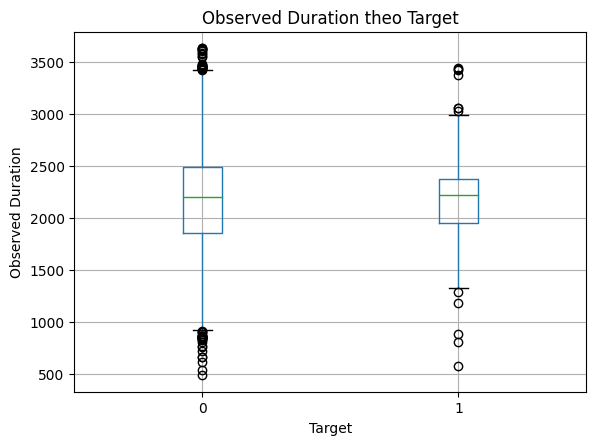

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

train_df.boxplot(
    column="observed_duration",
    by="target",
    grid=True
)

plt.xlabel("Target")
plt.ylabel("Observed Duration")
plt.title("Observed Duration theo Target")
plt.suptitle("")
plt.show()

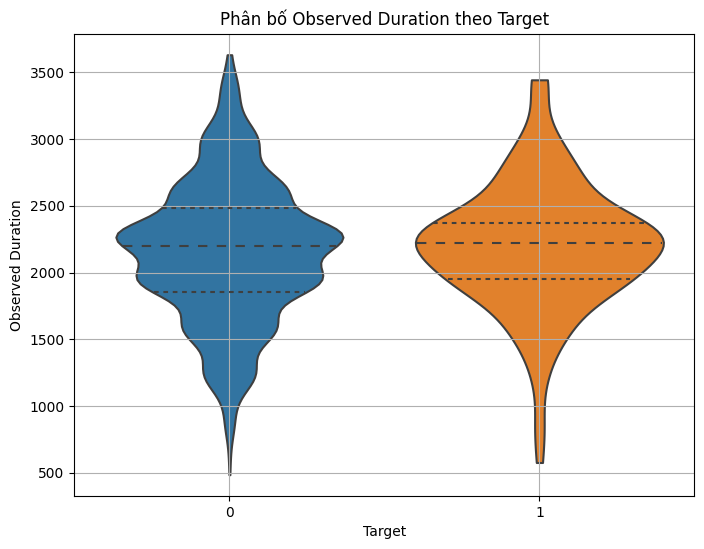

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.violinplot(
    x="target",
    y="observed_duration",
    data=train_df,
    inner="quartile",
    cut=0
)

plt.xlabel("Target")
plt.ylabel("Observed Duration")
plt.title("Phân bố Observed Duration theo Target")
plt.grid(True)
plt.show()

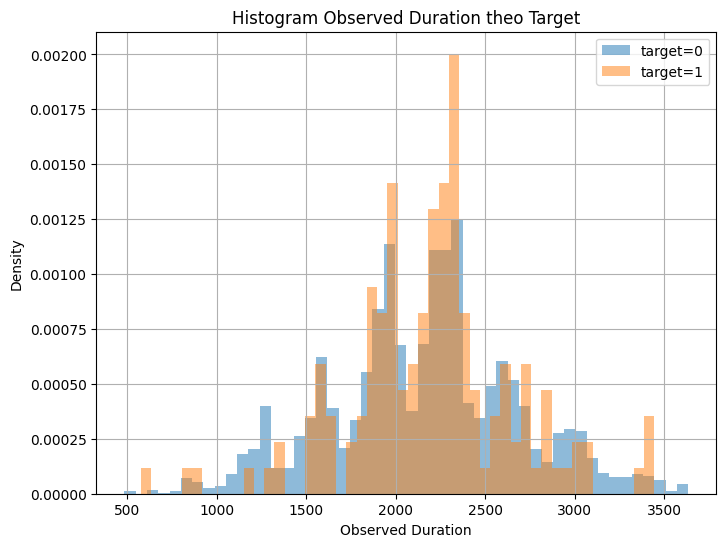

In [21]:
plt.figure(figsize=(8, 6))

for label in sorted(train_df["target"].unique()):
    subset = train_df[train_df["target"] == label]
    plt.hist(
        subset["observed_duration"],
        bins=50,
        alpha=0.5,
        label=f"target={label}",
        density=True
    )

plt.xlabel("Observed Duration")
plt.ylabel("Density")
plt.title("Histogram Observed Duration theo Target")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd

def calculate_color_u_g(df, flux_col="Flux_true"):
    u_data = df[df["Filter"] == "u"]
    g_data = df[df["Filter"] == "g"]

    if u_data.empty or g_data.empty:
        return np.nan

    u_max = u_data[flux_col].max()
    g_max = g_data[flux_col].max()

    if u_max <= 0 or g_max <= 0:
        return np.nan

    return -2.5 * np.log10(u_max / g_max)

In [ ]:
def calculate_color_g_r(df, flux_col="Flux_true"):
    g_data = df[df["Filter"] == "g"]
    r_data = df[df["Filter"] == "r"]

    if g_data.empty or r_data.empty:
        return np.nan

    g_max = g_data[flux_col].max()
    r_max = r_data[flux_col].max()

    if g_max <= 0 or r_max <= 0:
        return np.nan

    return -2.5 * np.log10(g_max / r_max)

In [29]:
from tqdm import tqdm
tqdm.pandas()

train_df["u_g"] = train_df["object_id"].progress_apply(color_feature_u_g)
train_df["g_r"] = train_df["object_id"].progress_apply(color_feature_g_r)

100%|██████████| 3043/3043 [01:10<00:00, 43.34it/s]


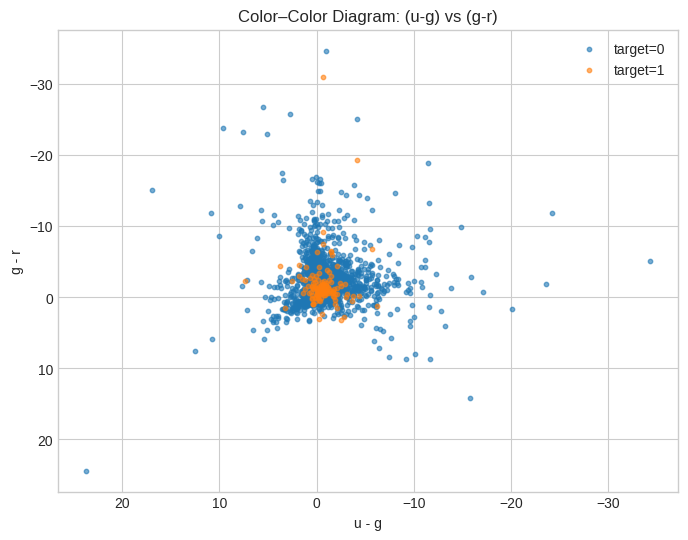

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for label in sorted(train_df["target"].unique()):
    subset = train_df[train_df["target"] == label]
    plt.scatter(
        subset["u_g"],
        subset["g_r"],
        s=10,
        alpha=0.6,
        label=f"target={label}"
    )

plt.xlabel("u - g")
plt.ylabel("g - r")
plt.title("Color–Color Diagram: (u-g) vs (g-r)")
plt.legend()
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.grid(True)
plt.show()

In [33]:
filter_colours = {'u': '#6A5ACD', 'g': '#2ca02c', 'r': '#d62728', 'i': '#ff7f0e', 'z': '#8c564b', 'y': '#1b1b1b'}

def plot_lightcurves(dfs, flux_col="Flux", names=None, filter_colours=filter_colours):
    for i, df_lc in enumerate(dfs):
        df_lc = df_lc.sort_values("Time (MJD)")
        times = df_lc["Time (MJD)"]
        flux = df_lc[flux_col]

        if names:
            color = filter_colours[names[i]] if filter_colours else None
            plt.plot(times, flux, label=names[i], color=color)
        else:
            plt.plot(times, flux)

    plt.xlabel('Time')
    plt.ylabel('Flux')
    plt.legend()

In [34]:
def plot_lc_for_id(object_id, flux_col="Flux"):
    split_folder = train_df[train_df["object_id"] == object_id].iloc[0]["split"]
    lightcurve_path = f"/kaggle/input/mallorn/mallorn-astronomical-classification-challenge/{split_folder}/train_full_lightcurves.csv"

    lightcurve_df = pd.read_csv(lightcurve_path)


    lightcurve_df = lightcurve_df[lightcurve_df["object_id"] == object_id]
    
    u_lc = lightcurve_df[lightcurve_df["Filter"] == "u"]
    g_lc = lightcurve_df[lightcurve_df["Filter"] == "g"]
    r_lc = lightcurve_df[lightcurve_df["Filter"] == "r"]
    i_lc = lightcurve_df[lightcurve_df["Filter"] == "i"]
    z_lc = lightcurve_df[lightcurve_df["Filter"] == "z"]
    y_lc = lightcurve_df[lightcurve_df["Filter"] == "y"]
    
    plot_lightcurves([u_lc, g_lc, r_lc, i_lc, z_lc, y_lc], flux_col=flux_col, names=["u", "g", "r", "i", "z", "y"])

In [35]:
train_df.sample(2)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


object_id       Z  Z_err    EBV SpecType  \
2450    aiglos_saig_mindon  0.5576    NaN  0.017      AGN   
2456  annon_salab_aderthad  1.2620    NaN  0.017      AGN   

                         English Translation     split  target  \
2450  plant, bush + hungry  + isolated hill   split_17       0   
2456            gate, door  + herb + reunion  split_17       0   

      observed_duration       u_g       g_r  
2450          1998.5337 -0.430636 -2.088123  
2456          2571.5723 -0.688214 -1.038282

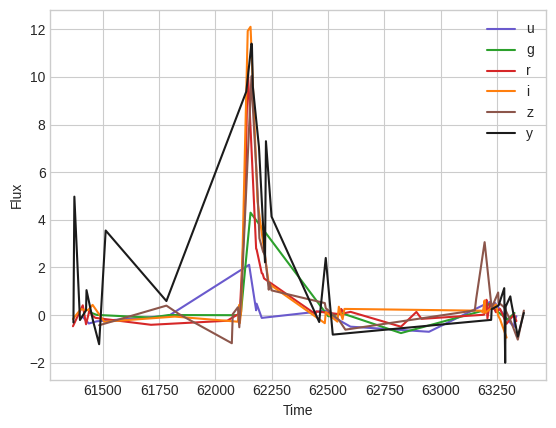

In [36]:
plot_lc_for_id("loss_anann_yll")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

def plot_multi_lightcurves(
    object_ids: list[str],
    flux_col="Flux",
    flux_err_col="Flux_err",
    plot_flux_err=False,
    figsize=(8, 3),
    ncols=1,
    filters: list[str] = ["u", "g", "r", "i", "z", "y"],
    base_path: str = "/kaggle/input/mallorn/mallorn-astronomical-classification-challenge",
    train_test: str = "train",
    split_col="split",
):
    filter_colours = {
        'u': '#6A5ACD',
        'g': '#2ca02c',
        'r': '#d62728',
        'i': '#ff7f0e',
        'z': '#8c564b',
        'y': '#1b1b1b'
    }
    
    n = len(object_ids)
    nrows = math.ceil(n / ncols)
    
    fig, axs = plt.subplots(
        nrows, ncols,
        figsize=(figsize[0]*ncols, figsize[1]*nrows),
        # sharex=True
    )
    
    if nrows * ncols == 1:
        axs = [axs]
    else:
        axs = axs.flatten()
    
    for ax, object_id in zip(axs, object_ids):
        row = train_df[train_df["object_id"] == object_id]
        if row.empty:
            ax.set_title(f"{object_id} (NOT FOUND)")
            continue

        split = row.iloc[0][split_col]
        lc_path = f"{base_path}/{split}/{train_test}_full_lightcurves.csv"

        lc_df = pd.read_csv(lc_path)
        lc_df = lc_df[lc_df["object_id"] == object_id]

        if lc_df.empty:
            ax.set_title(f"{object_id} (NO DATA)")
            continue

        for f in filters:
            df_f = lc_df[lc_df["Filter"] == f].sort_values("Time (MJD)")
            if df_f.empty:
                continue

            color = filter_colours[f]

            ax.plot(
                df_f["Time (MJD)"],
                df_f[flux_col],
                label=f,
                color=color,
                lw=1.5
            )

            if plot_flux_err and flux_err_col in df_f.columns:
                flux = df_f[flux_col].values
                err = df_f[flux_err_col].values
                time = df_f["Time (MJD)"].values

                ax.fill_between(
                    time,
                    flux - err,
                    flux + err,
                    color=color,
                    alpha=0.25,
                    linewidth=0
                )

        ax.set_title(object_id, fontsize=10)
        ax.set_ylabel(flux_col)
        ax.legend(ncol=len(filters), fontsize=8)

    for ax in axs[len(object_ids):]:
        ax.axis('off')

    plt.xlabel("Time (MJD)")
    plt.tight_layout()
    plt.show()

In [38]:
samples = train_df.groupby("target").sample(20)

positive_sample_ids = samples[samples["target"] == 1]["object_id"].to_list()
negative_sample_ids = samples[samples["target"] == 0]["object_id"].to_list()

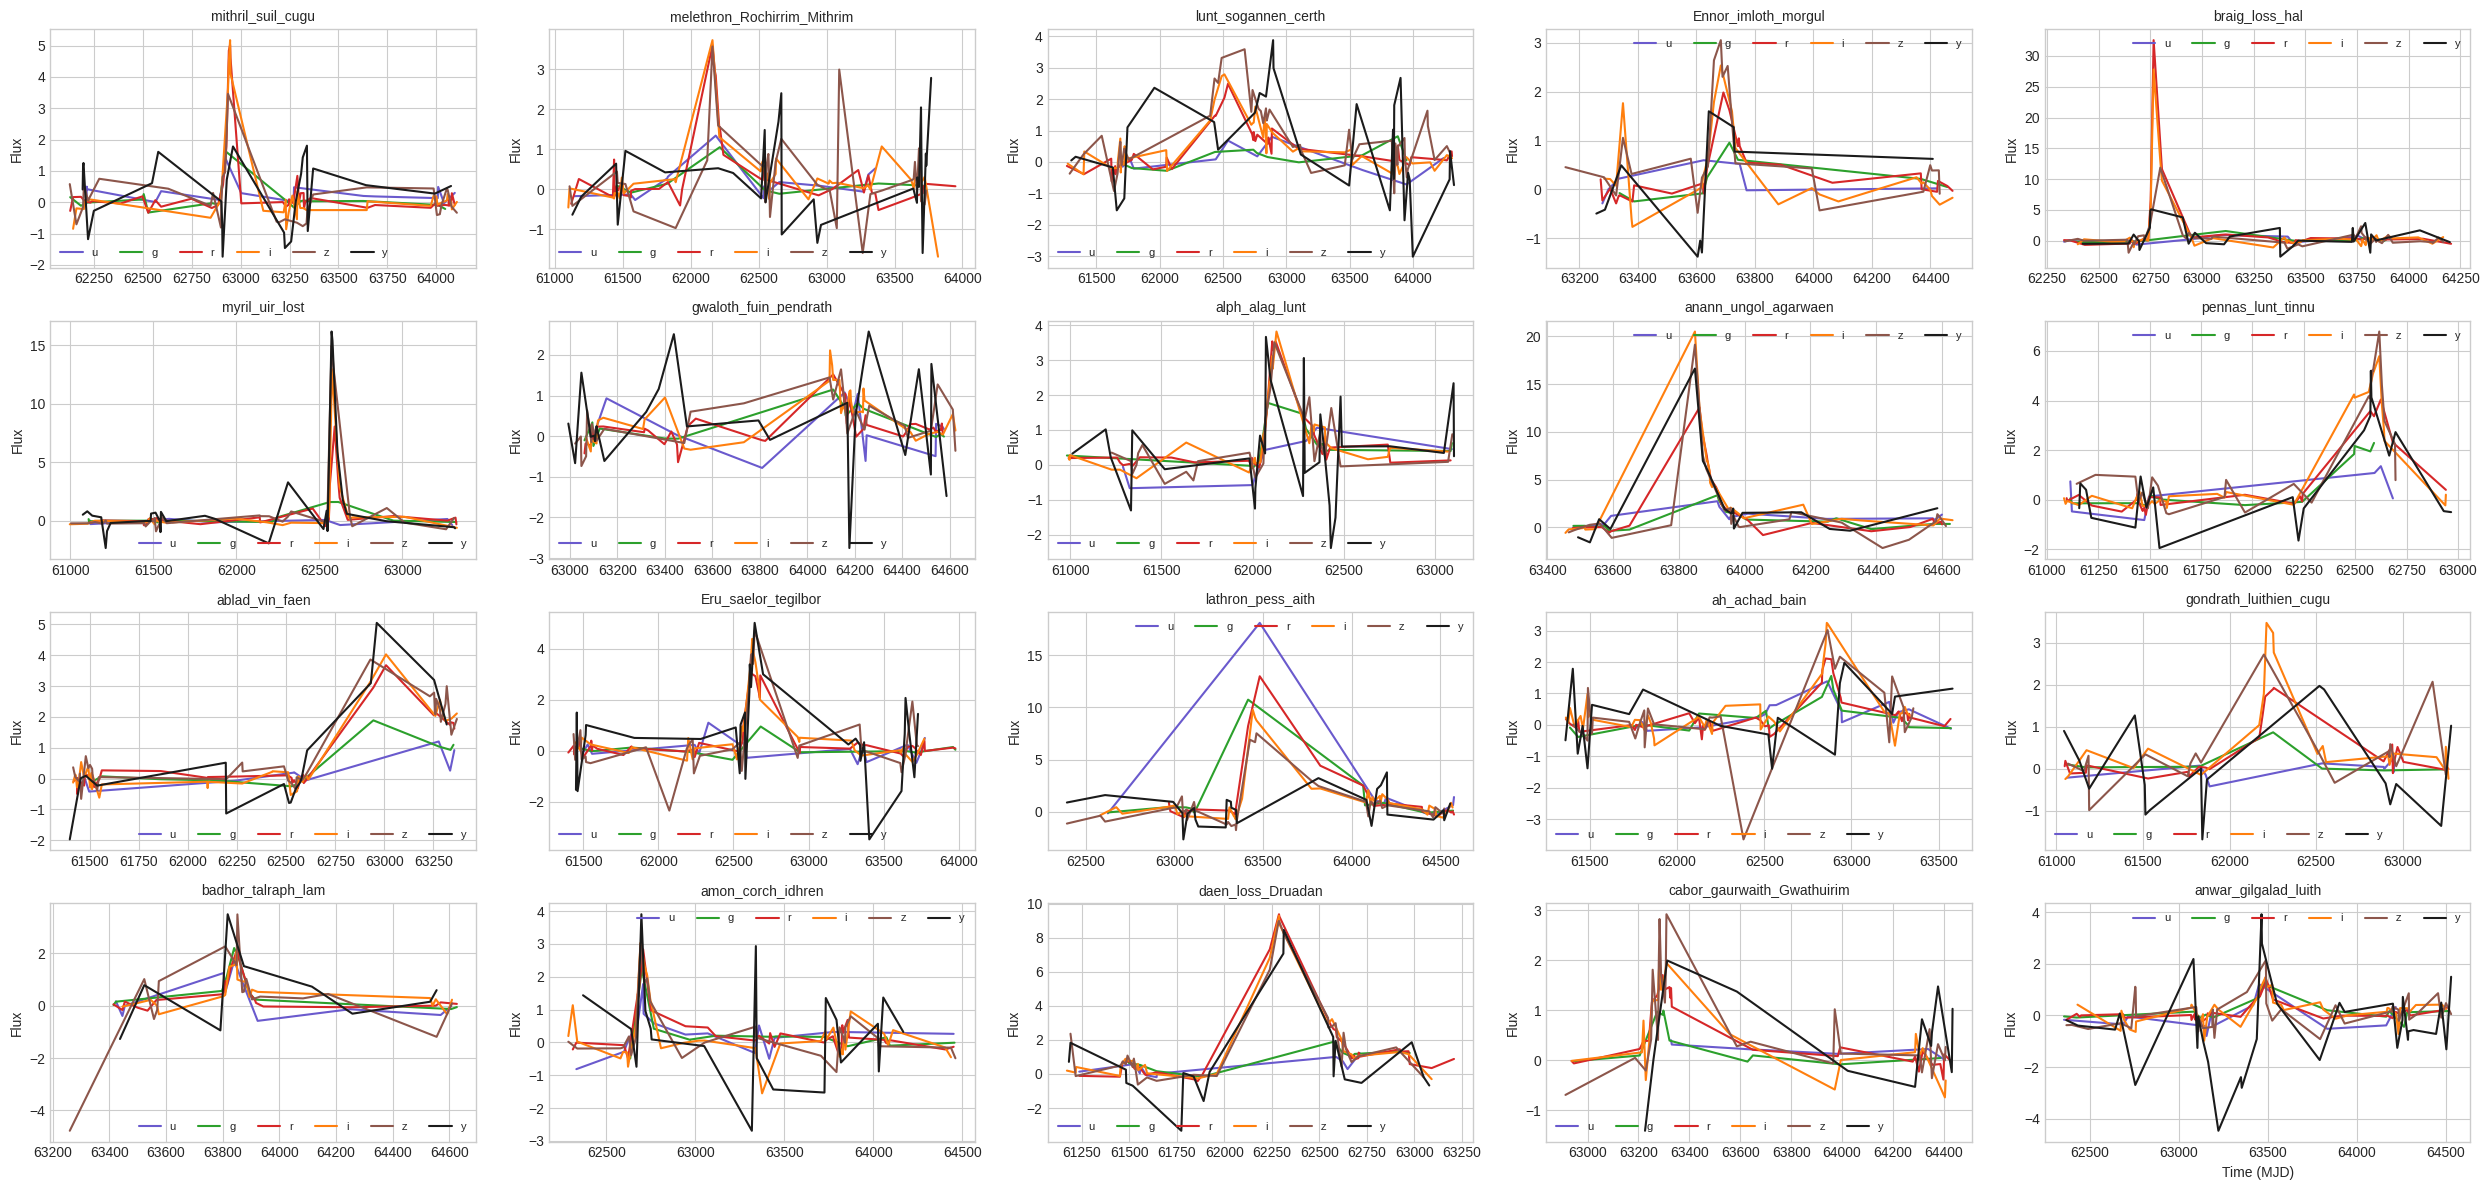

In [39]:
plot_multi_lightcurves(
    positive_sample_ids,
    figsize=(5, 3),
    ncols=5
)

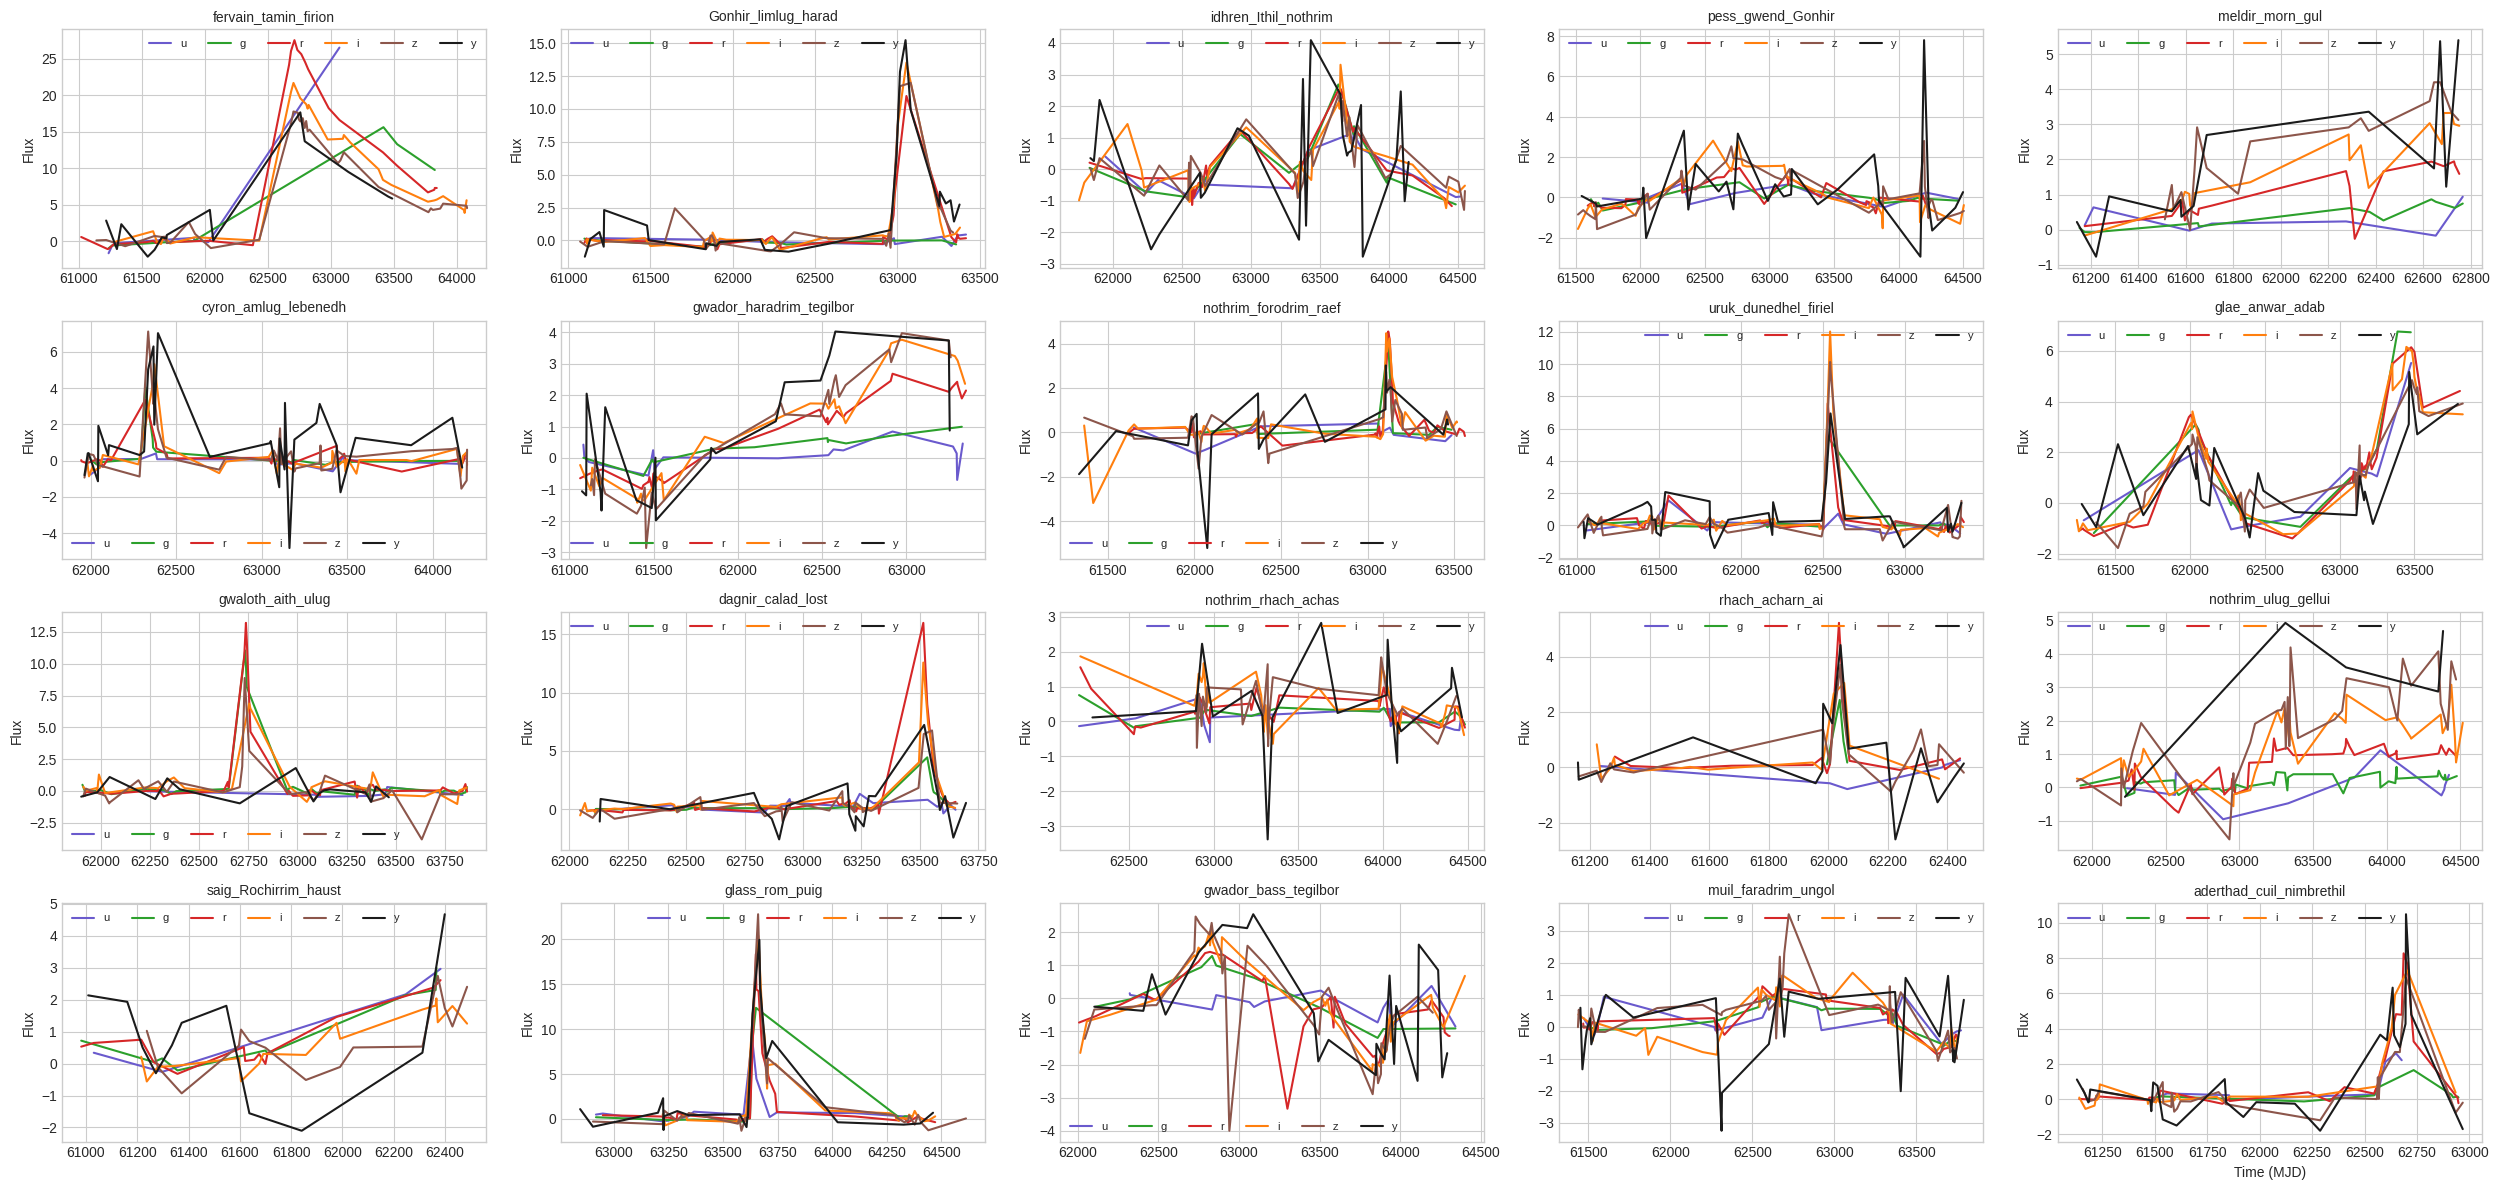

In [40]:
plot_multi_lightcurves(
    negative_sample_ids,
    figsize=(5, 3),
    ncols=5
)

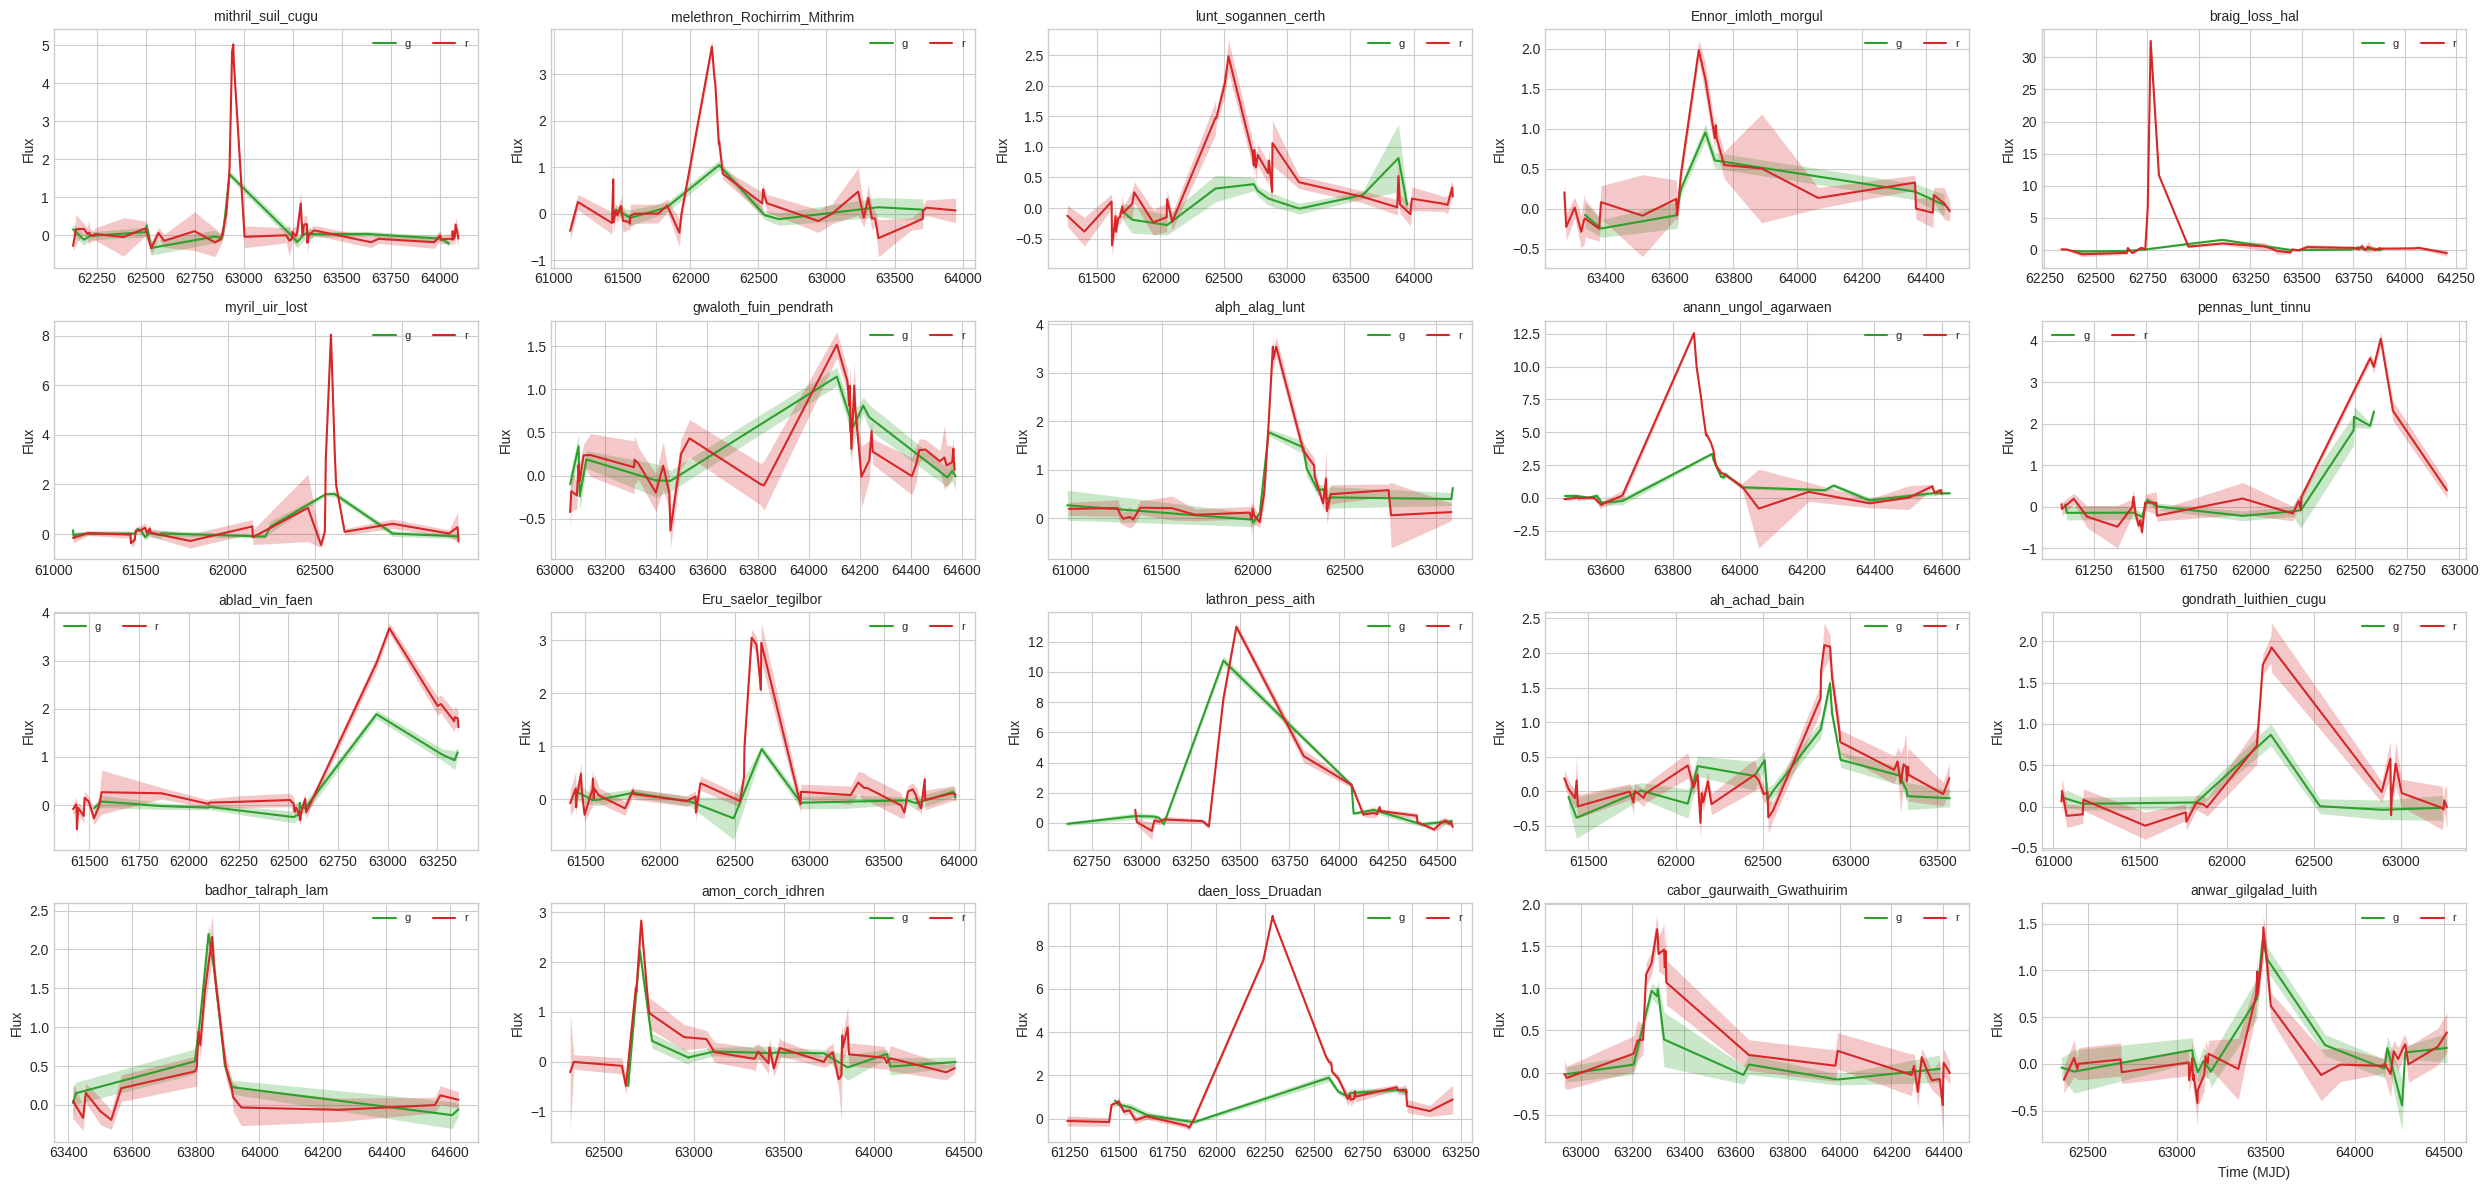

In [41]:
plot_multi_lightcurves(
    positive_sample_ids,
    figsize=(5, 3),
    ncols=5,
    filters=["g", "r"],
    plot_flux_err=True
)

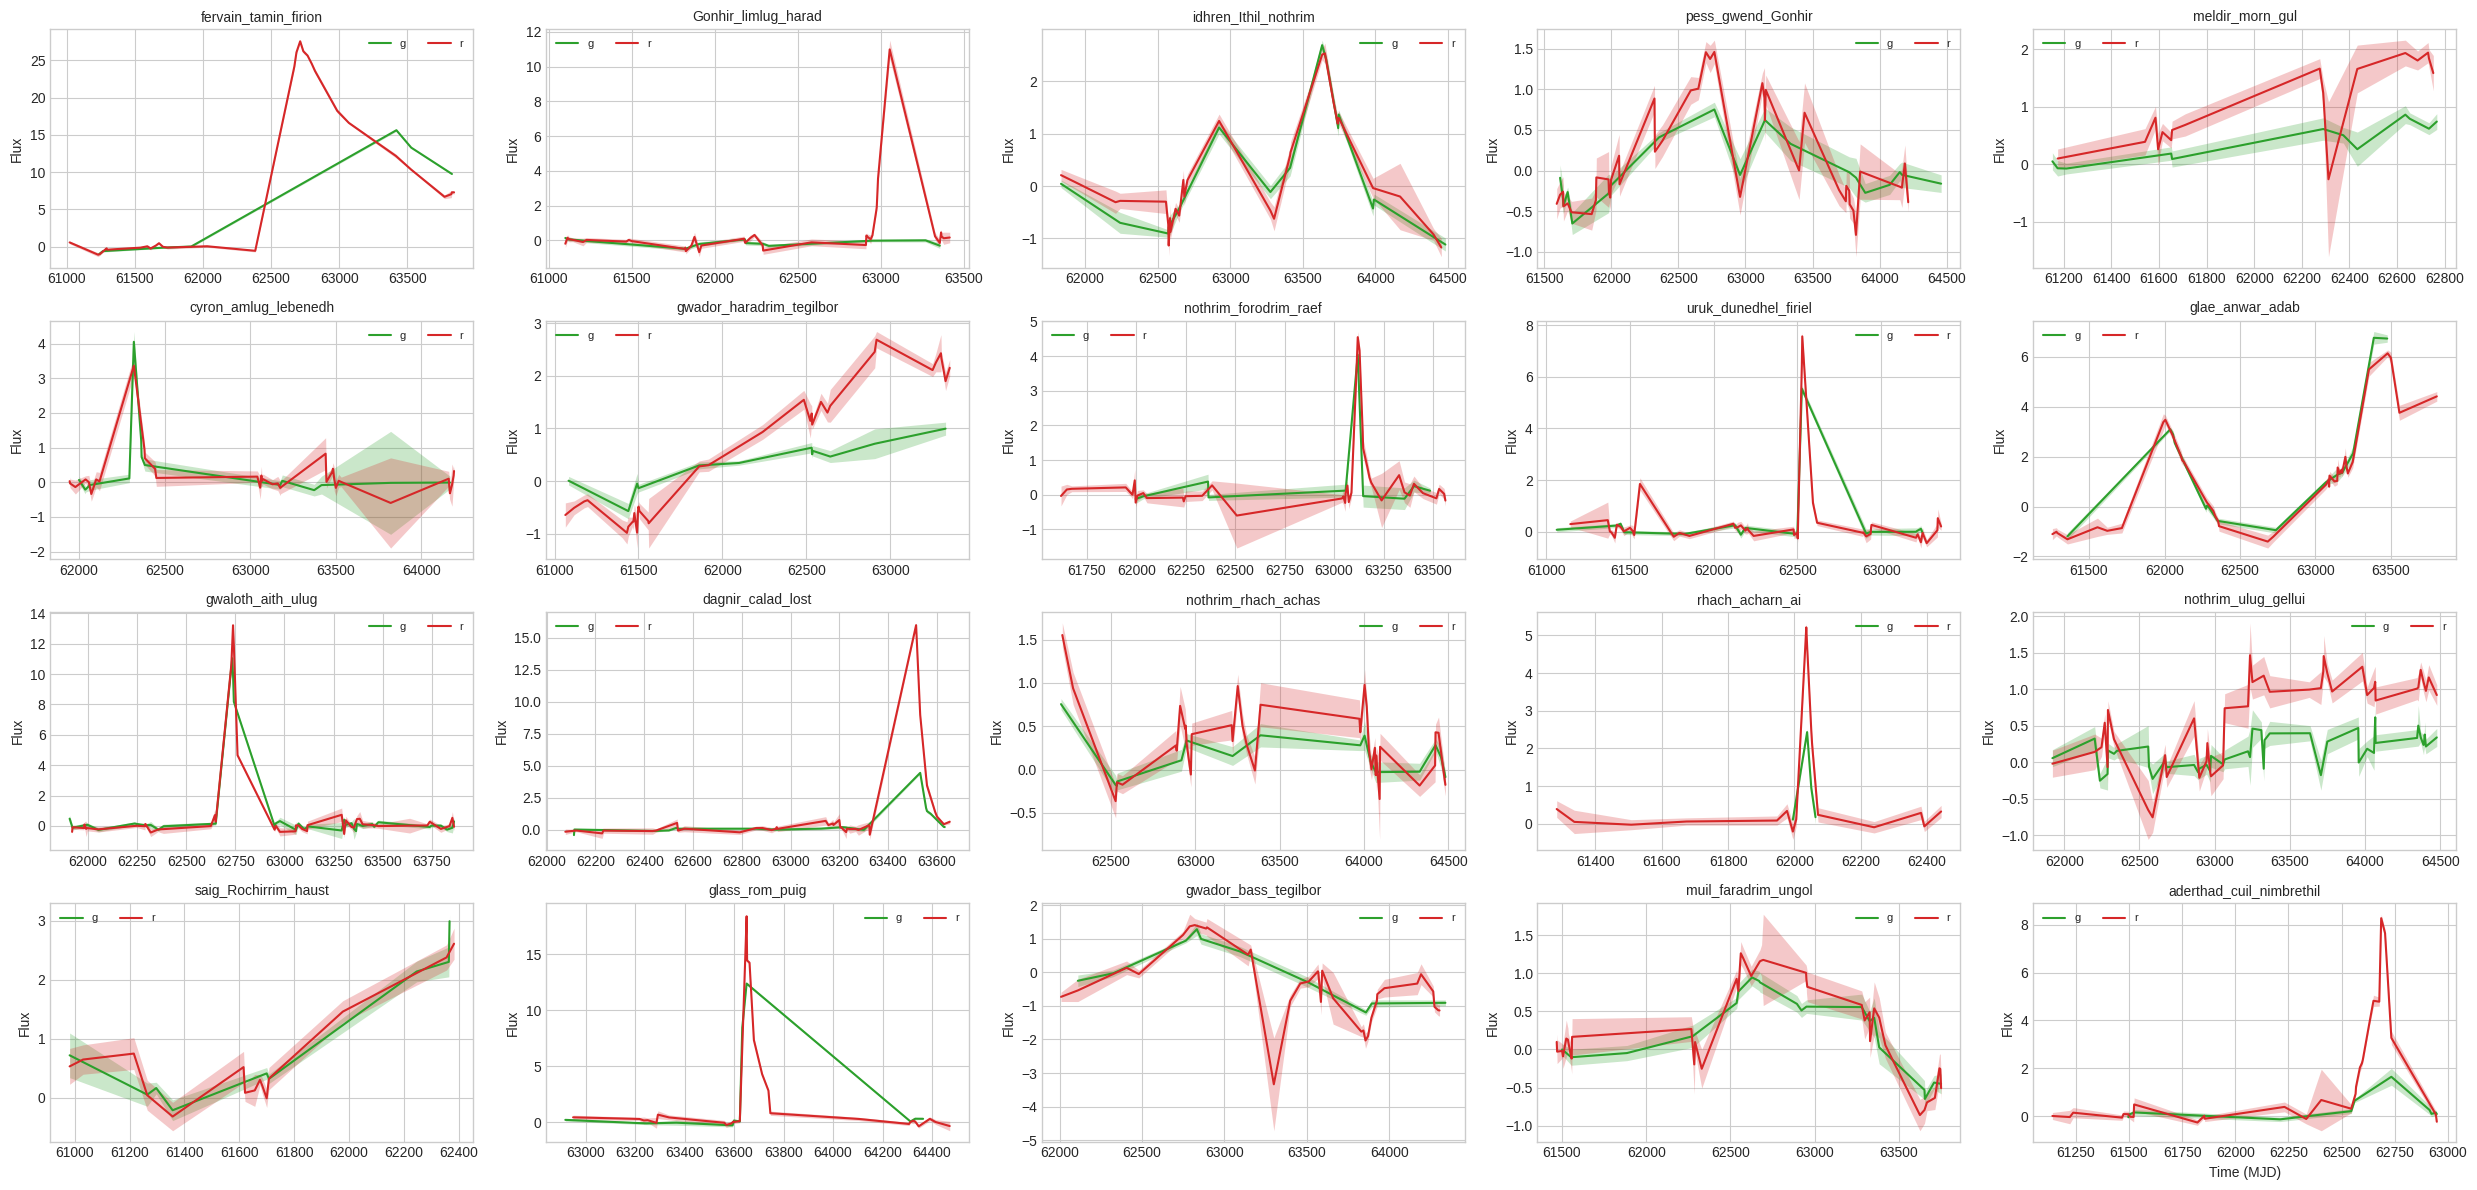

In [42]:
plot_multi_lightcurves(
    negative_sample_ids,
    figsize=(5, 3),
    ncols=5,
    filters=["g", "r"],
    plot_flux_err=True
)

## De-extinction Flux

Using_the_Data notebook:

$F_{true}=F_{obs} \times 10^{\frac{A_\lambda}{2.5}}$

$\sigma_{true}=\sigma_{obs} \times 10^{\frac{A_\lambda}{2.5}}$

${A_\lambda}$ phụ thuộc vào: Filter, E(B−V), Extinction law (Fitzpatrick99, ${R_V=3.2}$)

In [43]:
!pip install extinction==0.4.7

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 600.1/600.1 kB 11.1 MB/s eta 0:00:00a 0:00:01


In [44]:
from extinction import fitzpatrick99
import numpy as np
import os
from tqdm import tqdm

In [45]:
# Calculate flux_true 
flux_true_base_url = "lightcurves_flux_true"

eff_wavelengths = { "u": 3641, "g": 4704, "r": 6155, "i": 7504, "z": 8695, "y": 10056 }
R_V = 3.1

In [46]:
for idx, row in tqdm(train_df.iterrows(), total=len(train_df)):
    # print(row)
    split = row["split"]
    object_id = row["object_id"]
    ebv = row["EBV"]

    # print(split, object_id, ebv)
    
    lightcurves_path = f"/kaggle/input/mallorn/mallorn-astronomical-classification-challenge/{split}/train_full_lightcurves.csv"
    # print(lightcurves_path)
    lightcurves_df = pd.read_csv(lightcurves_path)
    lightcurves_df = lightcurves_df[lightcurves_df["object_id"] == object_id]

    A_lambda = lightcurves_df["Filter"].map(
        lambda f: fitzpatrick99(
            np.array([eff_wavelengths[f]]),
            ebv * R_V
        )[0]
    )

    scale = 10 ** (A_lambda / 2.5)

    lightcurves_df["Flux_true"] = lightcurves_df["Flux"] * scale
    lightcurves_df["Flux_err_true"] = lightcurves_df["Flux_err"] * scale
    
    # print(lightcurves_df.shape)
    # print(lightcurves_df.sample(5))

    os.makedirs(f"{flux_true_base_url}/{object_id}", exist_ok=True)
    save_path = f"{flux_true_base_url}/{object_id}/train_full_lightcurves.csv"
    lightcurves_df.to_csv(save_path)

100%|██████████| 3043/3043 [01:18<00:00, 38.95it/s]


In [47]:
for idx, row in tqdm(test_df.iterrows(), total=len(test_df)):
    # print(row)
    split = row["split"]
    object_id = row["object_id"]
    ebv = row["EBV"]

    # print(split, object_id, ebv)
    
    lightcurves_path = f"/kaggle/input/mallorn/mallorn-astronomical-classification-challenge/{split}/test_full_lightcurves.csv"
    # print(lightcurves_path)
    lightcurves_df = pd.read_csv(lightcurves_path)
    lightcurves_df = lightcurves_df[lightcurves_df["object_id"] == object_id]

    A_lambda = lightcurves_df["Filter"].map(
        lambda f: fitzpatrick99(
            np.array([eff_wavelengths[f]]),
            ebv * R_V
        )[0]
    )

    scale = 10 ** (A_lambda / 2.5)

    lightcurves_df["Flux_true"] = lightcurves_df["Flux"] * scale
    lightcurves_df["Flux_err_true"] = lightcurves_df["Flux_err"] * scale
    
    # print(lightcurves_df.shape)
    # print(lightcurves_df.sample(5))

    os.makedirs(f"{flux_true_base_url}/{object_id}", exist_ok=True)
    save_path = f"{flux_true_base_url}/{object_id}/test_full_lightcurves.csv"
    lightcurves_df.to_csv(save_path)

100%|██████████| 7135/7135 [06:20<00:00, 18.76it/s]


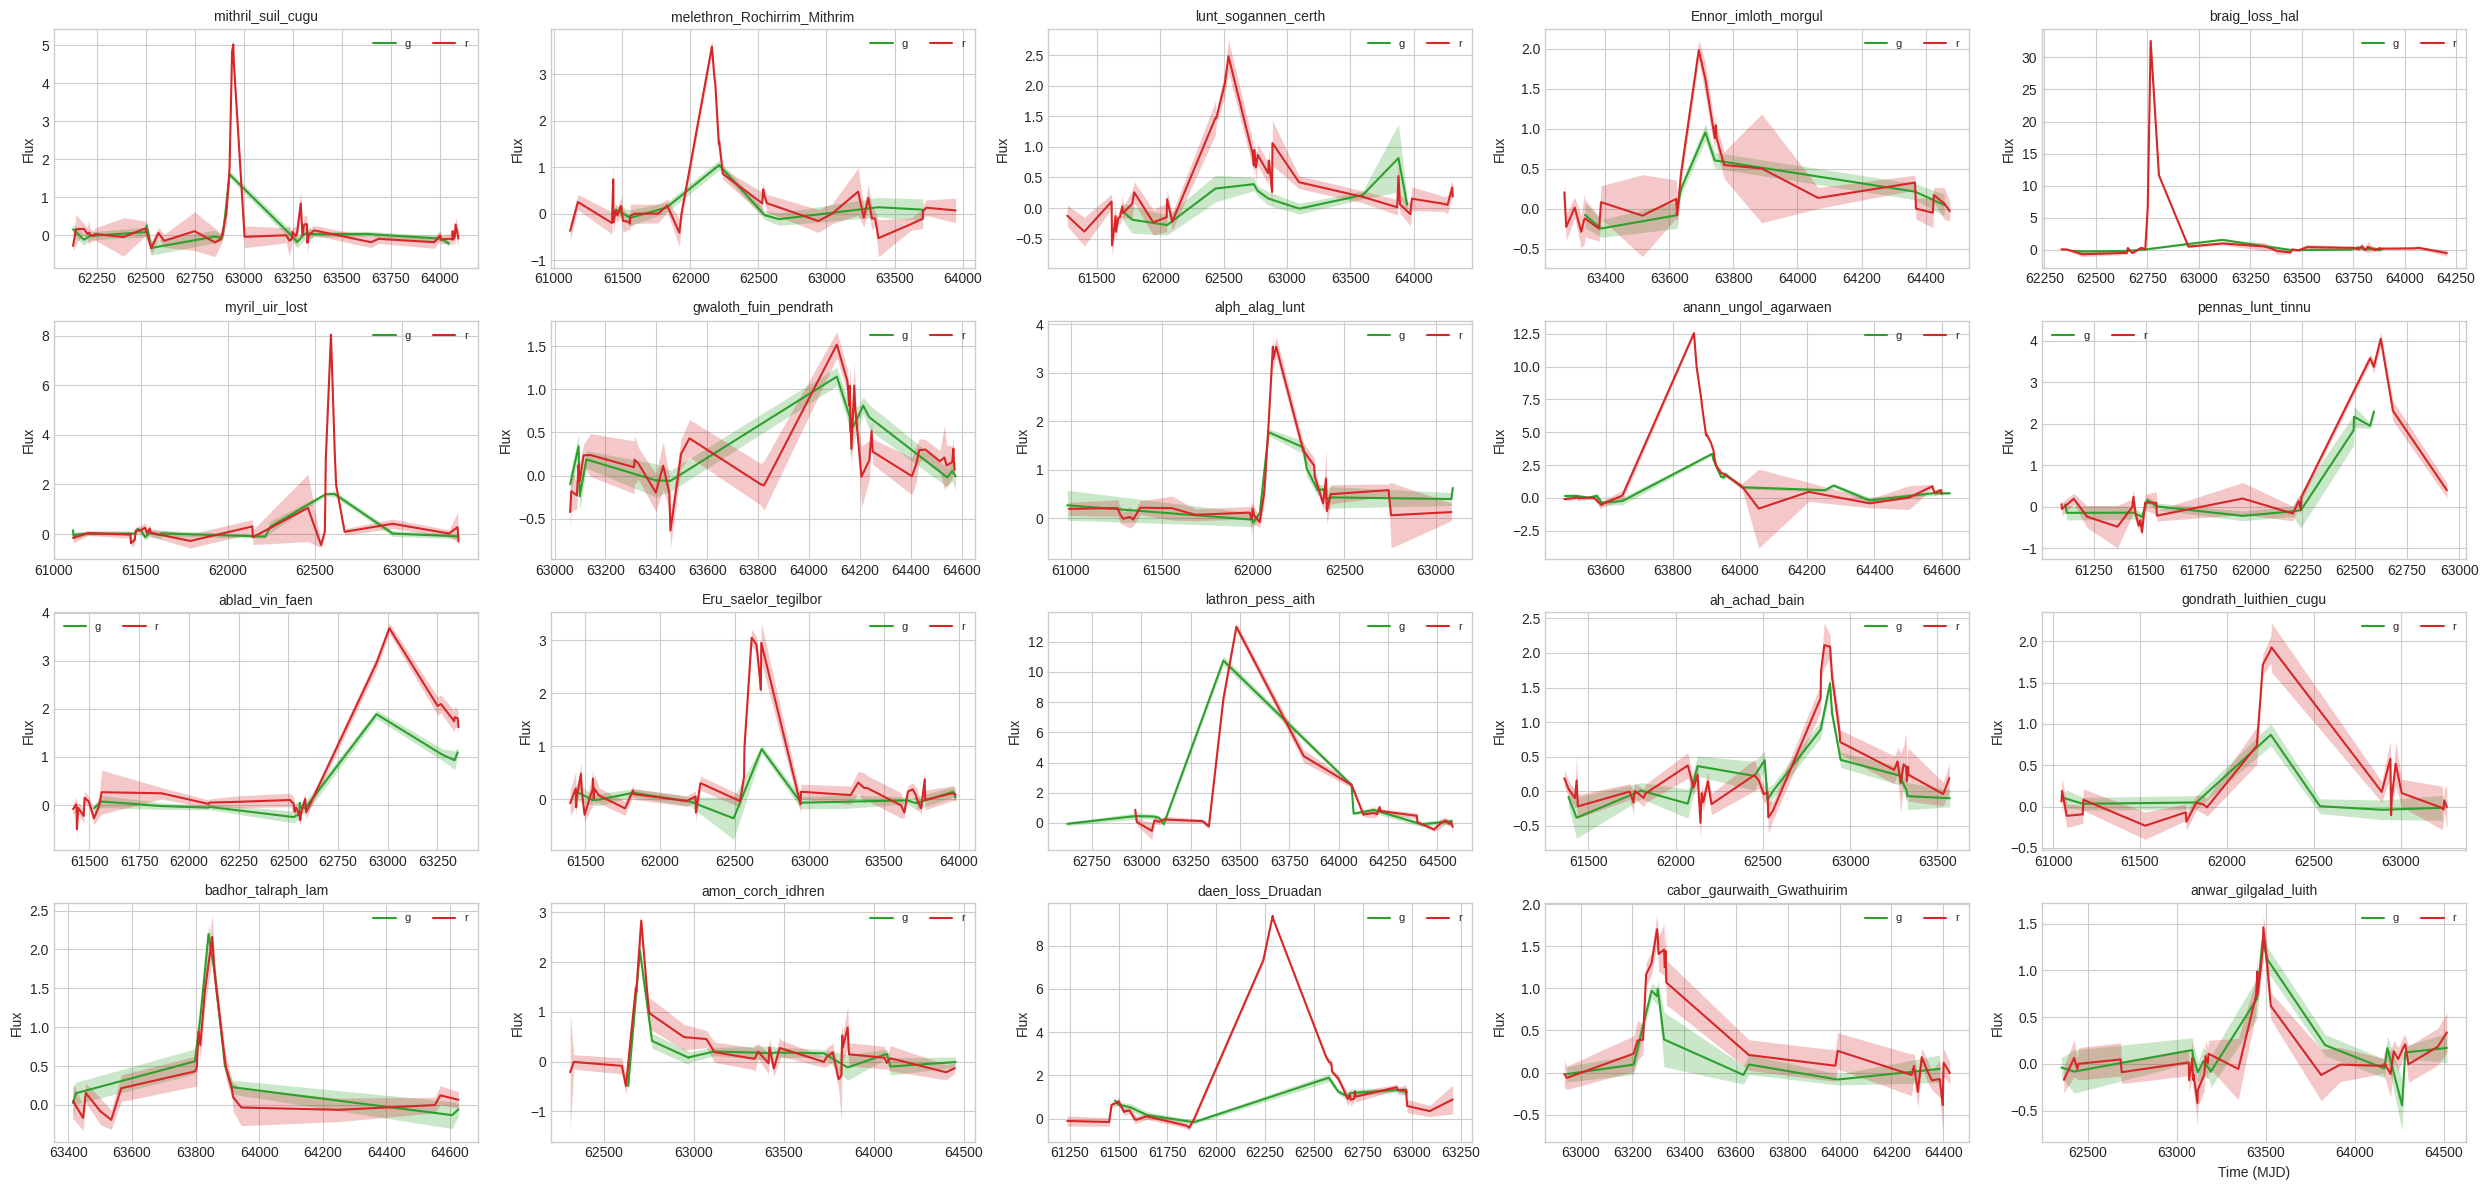

In [48]:
plot_multi_lightcurves(
    positive_sample_ids,
    figsize=(5, 3),
    ncols=5,
    filters=["g", "r"],
    plot_flux_err=True
)

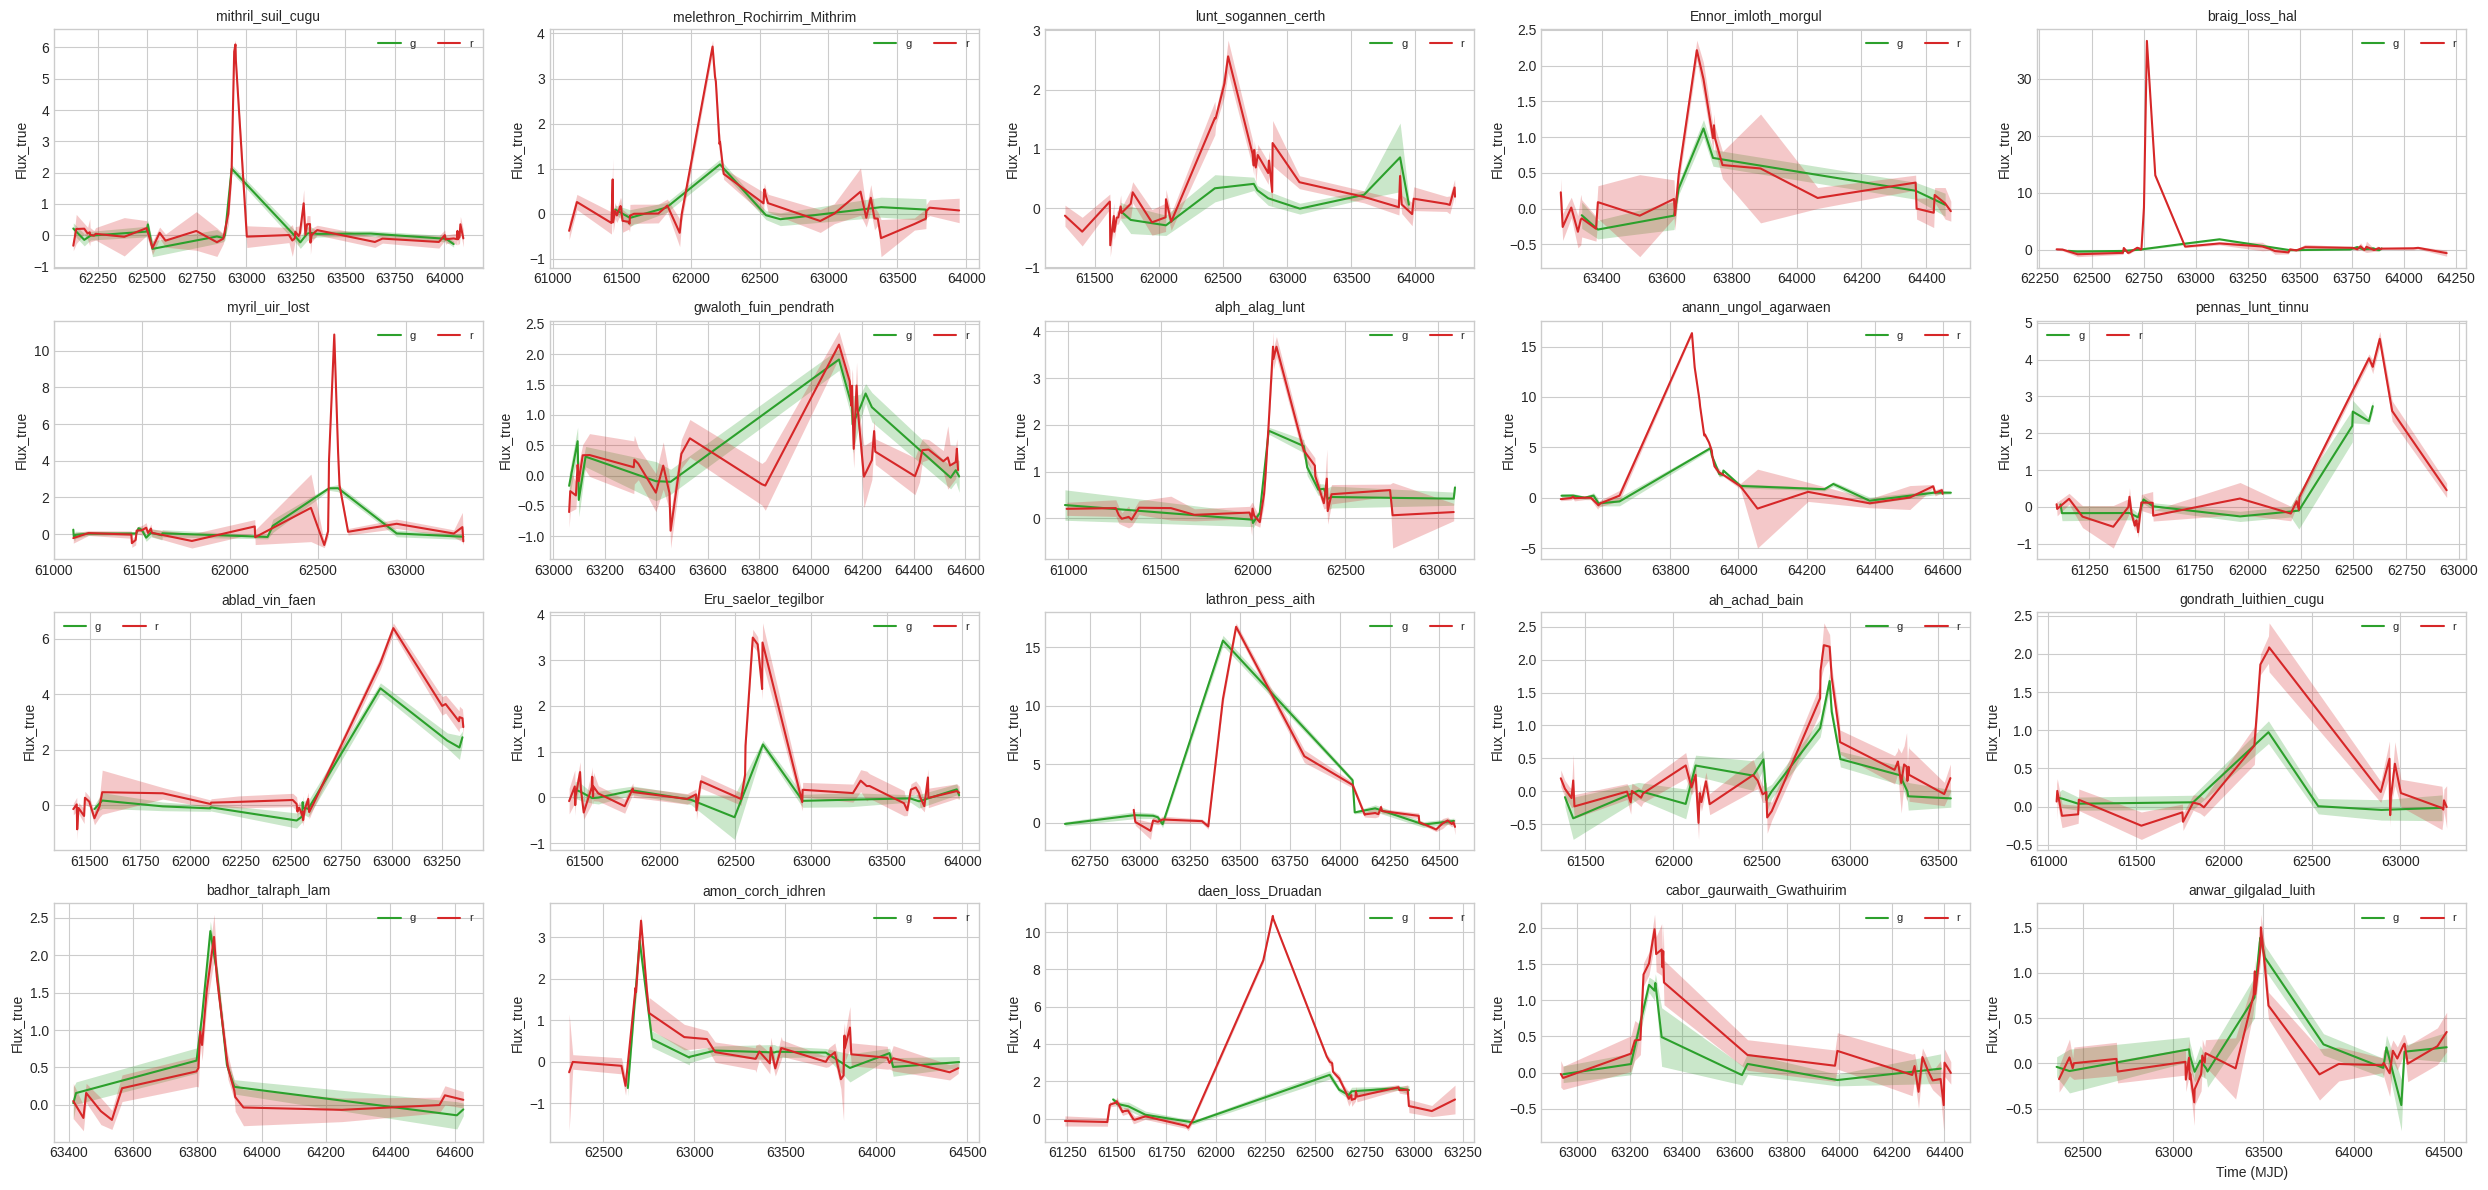

In [49]:
plot_multi_lightcurves(
    positive_sample_ids,
    figsize=(5, 3),
    ncols=5,
    filters=["g", "r"],
    base_path=flux_true_base_url,
    train_test="train",
    split_col="object_id",
    flux_col="Flux_true",
    plot_flux_err=True,
    flux_err_col="Flux_err_true"
)

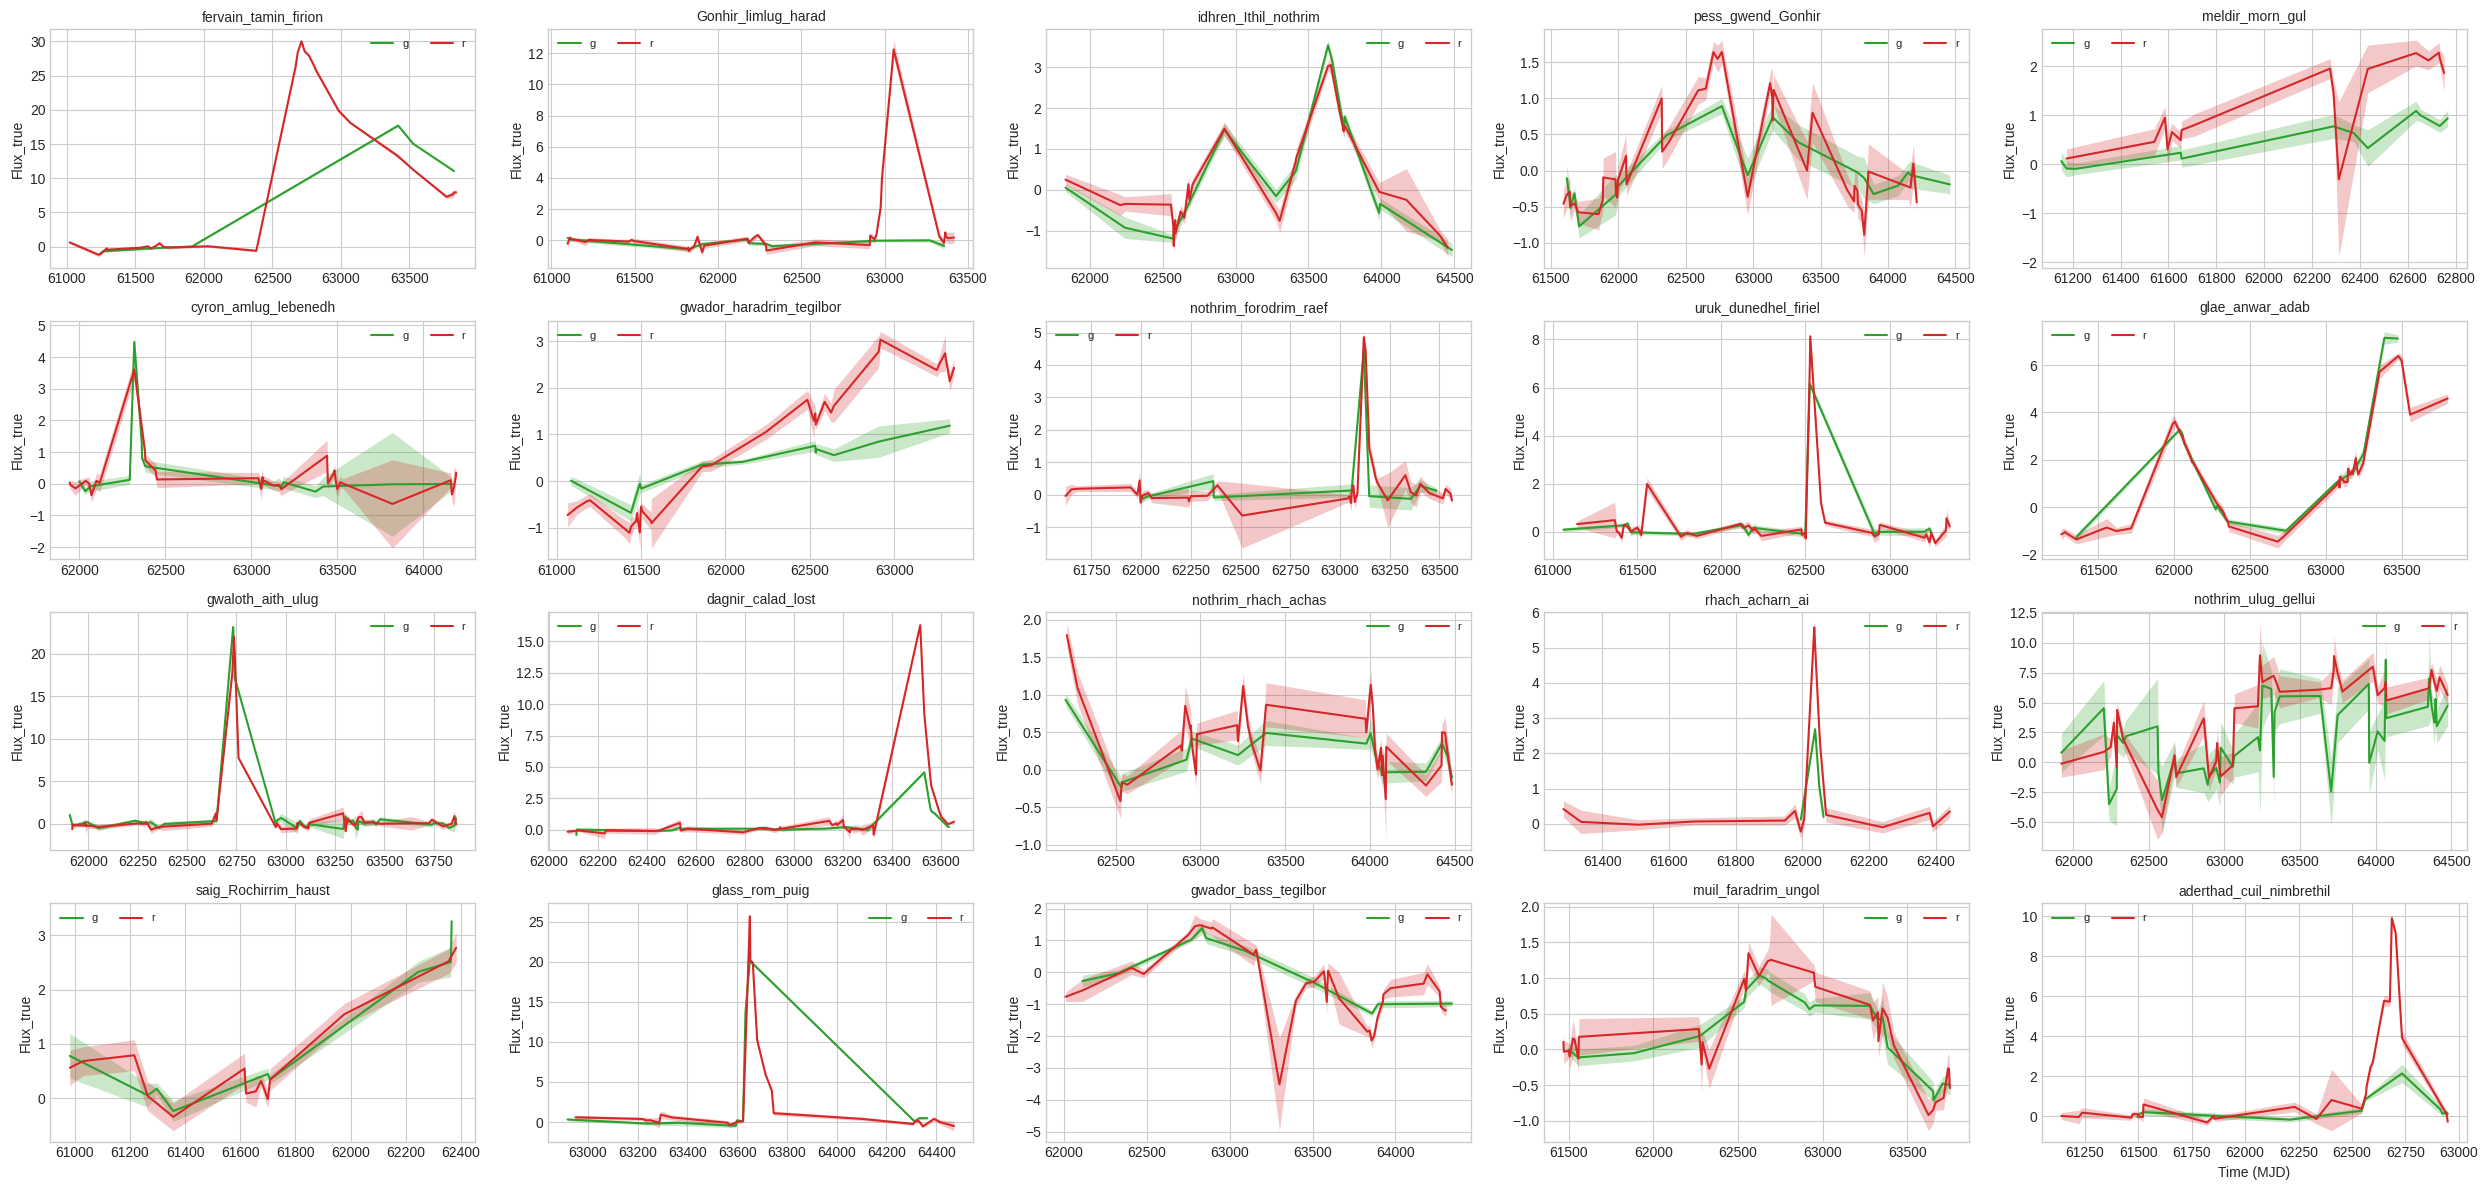

In [50]:
plot_multi_lightcurves(
    negative_sample_ids,
    figsize=(5, 3),
    ncols=5,
    filters=["g", "r"],
    base_path=flux_true_base_url,
    train_test="train",
    split_col="object_id",
    flux_col="Flux_true",
    plot_flux_err=True,
    flux_err_col="Flux_err_true"
)

# Feature Engineering

## FE1: Thống kê cơ bản

In [51]:
import numpy as np

def photometric_statistics(lightcurves_df):
    features = {}
    bands = ["u", "g", "r", "i", "z", "y"]

    for band in bands:
        df_band = lightcurves_df[lightcurves_df["Filter"] == band]

        # default: NaN
        if len(df_band) == 0:
            features.update({
                f"max_{band}": np.nan,
                f"min_{band}": np.nan,
                f"mean_{band}": np.nan,
                f"median_{band}": np.nan,
                f"std_{band}": np.nan,
                f"amp_{band}": np.nan,
            })
            continue

        flux = df_band["Flux"].values

        max_flux = np.max(flux)
        min_flux = np.min(flux)
        mean_flux = np.mean(flux)
        median_flux = np.median(flux)
        std_flux = np.std(flux)
        amp_flux = max_flux - min_flux

        features.update({
            f"max_{band}": max_flux,
            f"min_{band}": min_flux,
            f"mean_{band}": mean_flux,
            f"median_{band}": median_flux,
            f"std_{band}": std_flux,
            f"amp_{band}": amp_flux,
        })

    return features

## FE2: Auto FE - tsfresh

In [67]:
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction.settings import from_columns
import pandas as pd
import numpy as np

In [76]:
TSFRESH_SETTINGS = {
    "fft_coefficient": [{"coeff": 1, "attr": "abs"}],
    "approximate_entropy": [{"m": 2, "r": 0.3}],
    "sample_entropy": [{"m": 2, "r": 0.3}],
    "autocorrelation": [{"lag": 1}, {"lag": 5}],
    "skewness": None,
    "kurtosis": None,
    "mean_abs_change": None,
    "linear_trend": [{"attr": "slope"}],
    "number_peaks": [{"n": 5}],
    "count_above_mean": None,
    "count_below_mean": None,
}

In [82]:
def tsfresh_multiband_features(lightcurves_df):
    features = {}
    bands = ["u", "g", "r", "i", "z", "y"]

    for band in bands:
        df_band = lightcurves_df[lightcurves_df["Filter"] == band]

        if len(df_band) < 6:
            continue

        df_ts = pd.DataFrame({
            "id": 0,
            "time": df_band["Time (MJD)"].values,
            "value": df_band["Flux"].values
        })

        try:
            extracted = extract_features(
                df_ts,
                column_id="id",
                column_sort="time",
                default_fc_parameters=TSFRESH_SETTINGS,
                disable_progressbar=True,
                n_jobs=0
            )

            for col in extracted.columns:
                features[f"ts_{col}_{band}"] = extracted.iloc[0][col]

        except Exception:
            continue

    return features

## FE3: Physic Feature

In [105]:
import numpy as np

def log_luminosity_g(lightcurves_df, z, eps=1e-3):
    if z <= 0:
        return {"log_luminosity_g": np.nan}

    df_g = lightcurves_df[lightcurves_df["Filter"] == "g"]

    if len(df_g) == 0:
        return {"log_luminosity_g": np.nan}

    flux = df_g["Flux"].values
    max_flux = np.max(flux)

    if max_flux <= 0:
        return {"log_luminosity_g": np.nan}

    lum_proxy = max_flux * (z ** 2)

    return {
        "log_luminosity_g": np.log10(lum_proxy + eps)
    }

In [106]:
def temperature_proxies(lightcurves_df):
    features = {}

    def max_flux(band):
        df = lightcurves_df[lightcurves_df["Filter"] == band]
        return np.max(df["Flux"].values) if len(df) > 0 else np.nan

    max_u = max_flux("u")
    max_g = max_flux("g")
    max_r = max_flux("r")

    features["uv_excess_u_g"] = max_u - max_g if np.isfinite(max_u) and np.isfinite(max_g) else np.nan
    features["temp_proxy_g_r"] = max_g - max_r if np.isfinite(max_g) and np.isfinite(max_r) else np.nan

    return features

In [107]:
def rise_decay_features(lightcurves_df):
    features = {}

    df = lightcurves_df[lightcurves_df["Filter"] == "r"]

    if len(df) < 6:
        return {
            "rise_time": np.nan,
            "decay_time": np.nan,
            "rise_decay_ratio": np.nan
        }

    df = df.sort_values("Time (MJD)")
    time = df["Time (MJD)"].values
    flux = df["Flux"].values

    peak_idx = np.argmax(flux)
    peak_flux = flux[peak_idx]
    peak_time = time[peak_idx]

    # baseline ~ 10% peak
    baseline = 0.1 * peak_flux

    # Rise time
    try:
        t_rise_start = time[np.where(flux[:peak_idx] <= baseline)[0][-1]]
        rise_time = peak_time - t_rise_start
    except:
        rise_time = np.nan

    # Decay time
    try:
        t_decay_end = time[np.where(flux[peak_idx:] <= baseline)[0][0] + peak_idx]
        decay_time = t_decay_end - peak_time
    except:
        decay_time = np.nan

    ratio = rise_time / decay_time if np.isfinite(rise_time) and np.isfinite(decay_time) and decay_time > 0 else np.nan

    return {
        "rise_time": rise_time,
        "decay_time": decay_time,
        "rise_decay_ratio": ratio
    }

In [113]:
def time_lag_u_z(lightcurves_df):
    def peak_time(band):
        df = lightcurves_df[lightcurves_df["Filter"] == band]

        if len(df) < 3:
            return np.nan

        df = df.dropna(subset=["Flux", "Time (MJD)"])
        if len(df) == 0:
            return np.nan

        if (df["Flux"] <= 0).all():
            return np.nan

        idx = df["Flux"].idxmax()
        if pd.isna(idx):
            return np.nan

        return df.loc[idx, "Time (MJD)"]

    t_u = peak_time("u")
    t_z = peak_time("z")

    if np.isnan(t_u) or np.isnan(t_z):
        return {"time_lag_u_z": np.nan}

    return {"time_lag_u_z": t_z - t_u}

In [114]:
def physics_features(lightcurves_df, z):
    features = {}

    features.update(log_luminosity_g(lightcurves_df, z))
    features.update(temperature_proxies(lightcurves_df))
    features.update(rise_decay_features(lightcurves_df))
    features.update(time_lag_u_z(lightcurves_df))

    return features

## FE4: TDE power law

In [141]:
import numpy as np
from scipy.optimize import curve_fit

In [142]:
def tde_powerlaw(t, A, t0, C):
    return A * (t + t0) ** (-5.0 / 3.0) + C

In [143]:
def powerlaw_fit_band(lightcurves_df, band="g", min_points=5):
    df = lightcurves_df[lightcurves_df["Filter"] == band]

    if len(df) < min_points:
        return {
            f"plaw_chi2_{band}": np.nan,
            f"plaw_amp_{band}": np.nan,
            f"plaw_offset_{band}": np.nan,
            f"plaw_valid_{band}": 0
        }

    # sort by time
    df = df.sort_values("Time (MJD)")
    time = df["Time (MJD)"].values
    flux = df["Flux"].values
    flux_err = df["Flux_err"].values

    # find peak
    peak_idx = np.argmax(flux)
    t_peak = time[peak_idx]

    # post-peak
    mask = time > t_peak
    if mask.sum() < min_points:
        return {
            f"plaw_chi2_{band}": np.nan,
            f"plaw_amp_{band}": np.nan,
            f"plaw_offset_{band}": np.nan,
            f"plaw_valid_{band}": 0
        }

    t_post = time[mask] - t_peak
    f_post = flux[mask]
    ferr_post = flux_err[mask]

    valid = f_post > 0
    if valid.sum() < min_points:
        return {
            f"plaw_chi2_{band}": np.nan,
            f"plaw_amp_{band}": np.nan,
            f"plaw_offset_{band}": np.nan,
            f"plaw_valid_{band}": 0
        }

    t_post = t_post[valid]
    f_post = f_post[valid]
    ferr_post = ferr_post[valid]

    A0 = np.max(f_post)
    t00 = 1.0
    C0 = np.median(f_post[-3:])

    try:
        popt, _ = curve_fit(
            tde_powerlaw,
            t_post,
            f_post,
            sigma=ferr_post,
            p0=[A0, t00, C0],
            bounds=([0, 0.01, -np.inf], [np.inf, 100, np.inf]),
            maxfev=5000
        )

        A_fit, t0_fit, C_fit = popt

        # residuals
        f_fit = tde_powerlaw(t_post, *popt)
        chi2 = np.mean(((f_post - f_fit) / ferr_post) ** 2)

        return {
            f"plaw_chi2_{band}": chi2,
            f"plaw_amp_{band}": A_fit,
            f"plaw_offset_{band}": C_fit,
            f"plaw_valid_{band}": 1
        }

    except:
        return {
            f"plaw_chi2_{band}": np.nan,
            f"plaw_amp_{band}": np.nan,
            f"plaw_offset_{band}": np.nan,
            f"plaw_valid_{band}": 0
        }

In [144]:
def powerlaw_features(lightcurves_df):
    features = {}
    features.update(powerlaw_fit_band(lightcurves_df, band="g"))
    features.update(powerlaw_fit_band(lightcurves_df, band="r"))
    return features

## FE5: Model Fit: Bazin + DRW

In [180]:
import numpy as np
from scipy.optimize import curve_fit

In [181]:
def bazin_function(t, A, t0, tau_r, tau_f, C):
    return A * np.exp(-(t - t0) / tau_f) / (1 + np.exp(-(t - t0) / tau_r)) + C

In [182]:
def bazin_features(lightcurves_df, band="g", min_points=6):
    df = lightcurves_df[lightcurves_df["Filter"] == band]

    if len(df) < min_points:
        return {
            f"bazin_chi2_{band}": np.nan,
            f"bazin_tau_ratio_{band}": np.nan,
            f"bazin_valid_{band}": 0
        }

    df = df.dropna(subset=["Flux", "Time (MJD)", "Flux_err"])
    if len(df) < min_points:
        return {
            f"bazin_chi2_{band}": np.nan,
            f"bazin_tau_ratio_{band}": np.nan,
            f"bazin_valid_{band}": 0
        }

    t = df["Time (MJD)"].values
    f = df["Flux"].values
    ferr = df["Flux_err"].values

    # initial guess
    A0 = np.max(f)
    t00 = t[np.argmax(f)]
    tau_r0 = 10.0
    tau_f0 = 30.0
    C0 = np.median(f[:3])

    try:
        popt, _ = curve_fit(
            bazin_function,
            t,
            f,
            sigma=ferr,
            p0=[A0, t00, tau_r0, tau_f0, C0],
            bounds=(
                [0, t.min(), 1, 5, -np.inf],
                [np.inf, t.max(), 100, 300, np.inf]
            ),
            maxfev=5000
        )

        f_fit = bazin_function(t, *popt)
        chi2 = np.mean(((f - f_fit) / ferr) ** 2)

        tau_r, tau_f = popt[2], popt[3]

        return {
            f"bazin_chi2_{band}": chi2,
            f"bazin_tau_ratio_{band}": tau_r / tau_f,
            f"bazin_valid_{band}": 1
        }

    except:
        return {
            f"bazin_chi2_{band}": np.nan,
            f"bazin_tau_ratio_{band}": np.nan,
            f"bazin_valid_{band}": 0
        }

In [183]:
def bazin_multiband_features(lightcurves_df):
    features = {}
    for band in ["g", "r", "i"]:
        features.update(bazin_features(lightcurves_df, band))
    return features

In [184]:
def add_time_rel(df, mode="first"):
    df = df.copy()
    time = df["Time (MJD)"].values

    if len(time) == 0:
        df["Time_Rel"] = np.nan
        return df

    if mode == "first":
        t0 = np.nanmin(time)
    elif mode == "peak":
        valid = np.isfinite(df["Flux"].values)
        if valid.sum() == 0:
            t0 = np.nanmin(time)
        else:
            t0 = time[valid][np.argmax(df["Flux"].values[valid])]
    else:
        raise ValueError("mode must be 'first' or 'peak'")

    df["Time_Rel"] = time - t0
    return df

In [185]:
def extract_drw_features_band(df_obj, band="r", min_points=6):
    df_band = df_obj[df_obj["Filter"] == band]

    if len(df_band) < min_points:
        return {
            f"drw_tau_{band}": np.nan,
            f"drw_sigma_{band}": np.nan,
            f"drw_loglike_{band}": -50.0,
            f"drw_valid_{band}": 0
        }

    df_band = add_time_rel(df_band, mode="first")
    df_band = df_band.sort_values("Time_Rel")

    time = df_band["Time_Rel"].values.reshape(-1, 1)
    flux = df_band["Flux"].values
    flux_err = df_band["Flux_err"].values

    # NaN filter
    mask = np.isfinite(flux) & np.isfinite(flux_err)
    if mask.sum() < min_points:
        return {
            f"drw_tau_{band}": np.nan,
            f"drw_sigma_{band}": np.nan,
            f"drw_loglike_{band}": -50.0,
            f"drw_valid_{band}": 0
        }

    time = time[mask]
    flux = flux[mask]
    flux_err = flux_err[mask]

    # normalize flux
    f_mean = np.mean(flux)
    f_std = np.std(flux) + 1e-6
    y = (flux - f_mean) / f_std
    yerr = flux_err / f_std

    kernel = (
        ConstantKernel(1.0, (1e-3, 1e2)) *
        Matern(length_scale=50.0, length_scale_bounds=(1.0, 500.0), nu=0.5)
        + WhiteKernel(noise_level=0.5, noise_level_bounds=(1e-4, 5.0))
    )

    gp = GaussianProcessRegressor(
        kernel=kernel,
        alpha=yerr**2,
        normalize_y=False,
        n_restarts_optimizer=1,
        random_state=42
    )

    try:
        gp.fit(time, y)

        params = gp.kernel_.get_params()
        tau, sigma = np.nan, np.nan

        for k, v in params.items():
            if "length_scale" in k and "bounds" not in k:
                tau = float(v)
            if "constant_value" in k and "bounds" not in k:
                sigma = np.sqrt(v) * f_std

        loglike = np.clip(gp.log_marginal_likelihood(), -100, 50)

        return {
            f"drw_tau_{band}": tau,
            f"drw_sigma_{band}": sigma,
            f"drw_loglike_{band}": loglike,
            f"drw_valid_{band}": 1
        }

    except Exception:
        return {
            f"drw_tau_{band}": np.nan,
            f"drw_sigma_{band}": np.nan,
            f"drw_loglike_{band}": -50.0,
            f"drw_valid_{band}": 0
        }

In [186]:
def drw_features(lightcurves_df):
    features = {}

    features.update(extract_drw_features_band(lightcurves_df, band="g"))
    features.update(extract_drw_features_band(lightcurves_df, band="r"))

    return features

In [187]:
def model_fit_features(lightcurves_df):
    features = {}

    # SN-like
    features.update(bazin_multiband_features(lightcurves_df))

    # AGN-like
    features.update(drw_features(lightcurves_df))

    return features

## Main FE

In [188]:
def feature_eng(df, train=True):
    X_data = []
    print(f"Extract features ({'train' if train else 'test'})...")
    folder_name = "train" if train else "test"
    
    for idx, row in tqdm(df.iterrows(), total=len(df)):
        object_id = row["object_id"]
        z = row["Z"]
        ebv = row["EBV"]
        feat = { "Z": z, "EBV": ebv }
        
        lightcurves_path = f"{flux_true_base_url}/{object_id}/{folder_name}_full_lightcurves.csv"
        lightcurves_df = pd.read_csv(lightcurves_path)

        # Feature Engineering 1: Basic Statistic
        feat.update(photometric_statistics(lightcurves_df))

        # Feature Engineering 2: tsfresh auto FE
        feat.update(tsfresh_multiband_features(lightcurves_df))

        # FE 3: physic feature
        feat.update(physics_features(lightcurves_df, z))

        # FE 4: TDE power law fit
        feat.update(powerlaw_features(lightcurves_df))

        # FE5: model fit: Bazin + DRW
        feat.update(model_fit_features(lightcurves_df))
        
        if train:
            feat.update({ "target": row["target"] })

        X_data.append(feat)

    return pd.DataFrame(X_data)

In [189]:
import warnings
from scipy.optimize import curve_fit, OptimizeWarning
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=OptimizeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [190]:
FE_train_df = feature_eng(train_df)

Extract features (train)...


100%|██████████| 3043/3043 [15:53<00:00,  3.19it/s] 


In [191]:
FE_train_df.sample(3)

Z    EBV     max_u     min_u    mean_u  median_u     std_u  \
2957  0.7705  0.012  0.403281 -0.584253 -0.163602 -0.141320  0.290767   
795   1.3240  0.086  0.680260 -0.390741  0.086632  0.012133  0.302116   
1128  0.4053  0.013  0.761608 -0.397052  0.027813 -0.032325  0.364811   

         amp_u     max_g     min_g  ...  bazin_valid_i   drw_tau_g  \
2957  0.987534  0.622954 -0.428819  ...              1  256.133767   
795   1.071001  0.705149 -0.201326  ...              1  459.179781   
1128  1.158660  2.901802 -0.396761  ...              1   15.334058   

      drw_sigma_g  drw_loglike_g  drw_valid_g   drw_tau_r  drw_sigma_r  \
2957     0.332927     -13.629415            1  428.819747     0.651811   
795      0.255359     -14.084232            1  375.402613     0.416654   
1128     0.865475     -15.527325            1   36.671122     1.093586   

      drw_loglike_r  drw_valid_r  target  
2957     -26.809775            1       0  
795      -18.957194            1       0  
1128     -29.860275            1       0  

[3 rows x 71 columns]

In [192]:
FE_test_df = feature_eng(test_df, train=False)

Extract features (test)...


100%|██████████| 7135/7135 [36:19<00:00,  3.27it/s]  


In [193]:
FE_test_df.sample(3)

Z    EBV     max_u     min_u    mean_u  median_u     std_u  \
5211  0.2796  0.067  0.020679 -0.172370 -0.087915 -0.099984  0.085378   
988   4.4520  0.014  1.522273  0.330029  0.994680  1.131738  0.496286   
1285  1.5470  0.079  0.803337 -0.344378  0.036971 -0.053879  0.391975   

         amp_u     max_g     min_g  ...  bazin_tau_ratio_i  bazin_valid_i  \
5211  0.193050  1.606556  0.214040  ...           0.301925              1   
988   1.192243  2.851893  0.353950  ...           0.942275              1   
1285  1.147715  0.541137 -0.080573  ...           0.009735              1   

      drw_tau_g  drw_sigma_g  drw_loglike_g  drw_valid_g   drw_tau_r  \
5211  43.903093     0.515537      -8.410225            1  239.837715   
988         NaN          NaN     -50.000000            0  500.000000   
1285   7.438882     0.020028     -16.812705            1  500.000000   

      drw_sigma_r  drw_loglike_r  drw_valid_r  
5211     0.715488     -18.272262            1  
988      1.172913      -7.820208            1  
1285     0.295873     -32.906370            1  

[3 rows x 70 columns]

In [194]:
FE_X_train = FE_train_df.drop(["target"], axis=1)
FE_y_train = FE_train_df["target"]

FE_X_test = FE_test_df

In [195]:
FE_X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
FE_X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# XGBoost

In [196]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

In [197]:
def xgb_cv_f1(n_estimators, max_depth, learning_rate, subsample, colsample_bytree):
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in skf.split(FE_X_train, FE_y_train):
        X_tr, X_val = FE_X_train.iloc[train_idx], FE_X_train.iloc[val_idx]
        y_tr, y_val = FE_y_train.iloc[train_idx], FE_y_train.iloc[val_idx]

        neg, pos = np.bincount(y_tr)
        scale_pos_weight = neg / pos

        model = XGBClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            objective="binary:logistic",
            eval_metric="logloss",
            scale_pos_weight=scale_pos_weight,
            tree_method="hist",
            random_state=42
        )

        model.fit(X_tr, y_tr)

        val_proba = model.predict_proba(X_val)[:, 1]

        # Threshold tuning
        thresholds = np.linspace(0.05, 0.95, 100)
        f1_fold = max(
            f1_score(y_val, (val_proba >= t).astype(int))
            for t in thresholds
        )

        f1_scores.append(f1_fold)

    return np.mean(f1_scores)

In [198]:
!pip install bayesian-optimization

In [199]:
from bayes_opt import BayesianOptimization

In [200]:
pbounds = {
    "n_estimators": (300, 900),
    "max_depth": (3, 7),
    "learning_rate": (0.01, 0.15),
    "subsample": (0.6, 1.0),
    "colsample_bytree": (0.6, 1.0)
}

In [201]:
optimizer = BayesianOptimization(
    f=xgb_cv_f1,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(
    init_points=8,
    n_iter=25
)

|   iter    |  target   | n_esti... | max_depth | learni... | subsample | colsam... |
-------------------------------------------------------------------------------------
| 1         | 0.5848864 | 524.72407 | 6.8028572 | 0.1124791 | 0.8394633 | 0.6624074 |
| 2         | 0.5897926 | 393.59671 | 3.2323344 | 0.1312646 | 0.8404460 | 0.8832290 |
| 3         | 0.5941468 | 312.35069 | 6.8796394 | 0.1265419 | 0.6849356 | 0.6727299 |
| 4         | 0.6048681 | 410.04270 | 4.2169689 | 0.0834659 | 0.7727780 | 0.7164916 |
| 5         | 0.5844138 | 667.11173 | 3.5579754 | 0.0509002 | 0.7465447 | 0.7824279 |
| 6         | 0.6000158 | 771.10557 | 3.7986951 | 0.0819928 | 0.8369658 | 0.6185801 |
| 7         | 0.5932110 | 664.52691 | 3.6820964 | 0.0191072 | 0.9795542 | 0.9862528 |
| 8         | 0.6080477 | 785.03840 | 4.2184550 | 0.0236740 | 0.8736932 | 0.7760609 |
| 9         | 0.5855950 | 783.09235 | 3.7660909 | 0.0378649 | 0.9261664 | 0.8911448 |
| 10        | 0.5984027 | 532.26370 | 3.9256738 | 0.04

In [202]:
best_params = optimizer.max["params"]
best_params["n_estimators"] = int(best_params["n_estimators"])
best_params["max_depth"] = int(best_params["max_depth"])

print("Best CV F1:", optimizer.max["target"])
print("Best params:", best_params)

Best CV F1: 0.6186096962837201
Best params: {'n_estimators': 409, 'max_depth': 4, 'learning_rate': 0.07587953679298622, 'subsample': 0.8691204323058304, 'colsample_bytree': 0.7451302588226436}


In [203]:
neg, pos = np.bincount(FE_y_train)
scale_pos_weight = neg / pos

In [204]:
xgb_final = XGBClassifier(
    **best_params,
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    tree_method="hist",
    random_state=42
)

xgb_final.fit(FE_X_train, FE_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7451302588226436, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07587953679298622,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=409, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [205]:
import pandas as pd
import numpy as np

importances = xgb_final.feature_importances_

feat_imp = pd.DataFrame({
    "feature": FE_X_train.columns,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(feat_imp.head(20))

              feature  importance
59       bazin_chi2_i    0.066832
56       bazin_chi2_r    0.058156
53       bazin_chi2_g    0.046951
50         plaw_amp_r    0.042394
57  bazin_tau_ratio_r    0.041332
66          drw_tau_r    0.038119
14              max_r    0.037086
41          rise_time    0.036750
42         decay_time    0.035301
8               max_g    0.033694
4              mean_u    0.028366
2               max_u    0.023940
60  bazin_tau_ratio_i    0.022325
62          drw_tau_g    0.021552
19              amp_r    0.020023
20              max_i    0.019856
40     temp_proxy_g_r    0.019543
17           median_r    0.019162
31              amp_z    0.019112
30              std_z    0.016849


In [206]:
from sklearn.model_selection import cross_val_predict

oof_proba_xgb = cross_val_predict(
    xgb_final,
    FE_X_train,
    FE_y_train,
    cv=5,
    method="predict_proba"
)[:, 1]

thresholds = np.linspace(0.05, 0.95, 200)
f1s = [f1_score(FE_y_train, oof_proba_xgb >= t) for t in thresholds]

best_t = thresholds[np.argmax(f1s)]
print("Best global threshold:", best_t)

Best global threshold: 0.2128140703517588


In [ ]:
train_cols = FE_X_train.columns

FE_X_test_aligned = FE_X_test.reindex(columns=train_cols)

missing_cols = set(train_cols) - set(FE_X_test.columns)
extra_cols = set(FE_X_test.columns) - set(train_cols)

print("Missing cols:", missing_cols)
print("Extra cols:", extra_cols)

Missing cols: set()
Extra cols: set()


In [208]:
test_proba = xgb_final.predict_proba(FE_X_test_aligned)[:, 1]
test_pred = (test_proba >= best_t).astype(int)

submission = pd.DataFrame({
    "object_id": test_df["object_id"],
    "target": test_pred
})

submission.to_csv("submission_xgb_bayes_cv_363636.csv", index=False)

In [209]:
from IPython.display import FileLink

FileLink("submission_xgb_bayes_cv_363636.csv")

/kaggle/working/submission_xgb_bayes_cv_363636.csv